# Predi√ß√£o de Valores de Carros Usados

## *Introdu√ß√£o*

Este projeto utiliza Machine Learning para prever os pre√ßos de carros usados com base em caracter√≠sticas como marca, ano de fabrica√ß√£o, tipo de combust√≠vel e quilometragem.
O Objetivo do projeto √© auxiliar consumidores e vendedores a entenderem a din√¢mica dos pre√ßos e a tomarem decis√µes informadas sobre compra e venda de carros usados nos Estados Unidos.


Os dados foram extra√≠dos de um dataset contendo informa√ß√µes detalhadas sobre ve√≠culos.

---


## Ferramentas Utilizadas

- **Linguagem**: Python
- **Bibliotecas**:
  - Manipula√ß√£o de Dados: `pandas`, `numpy`
  - Visualiza√ß√£o: `matplotlib`, `seaborn`
  - Modelagem: `scikit-learn`

## *Explora√ß√£o dos dados*

Inicialmente, vamos carregar algumas bibliotecas necess√°rias e o dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

import pandas as pd
from google.colab import drive

import os
os.environ["JOBLIB_MULTIPROCESSING"] = "0"

# carregando o dataset
# Montando o Google Drive
drive.mount('/content/drive')

# Definindo o caminho base (substitua pelo caminho da pasta onde o CSV est√°)
file_path = '/content/drive/MyDrive/Faculdade/8s/ML/data'

# Fun√ß√£o para carregar o arquivo CSV
def load_data(car_path=file_path):
    # Caminho completo do arquivo CSV
    csv_path = os.path.join(car_path, "car_price_prediction.csv")  # Nome do seu arquivo CSV
    return pd.read_csv(csv_path)

# Carregando os dados
df = load_data()





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Informa√ß√µes iniciais do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.shape

(19237, 18)

In [ ]:
df.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

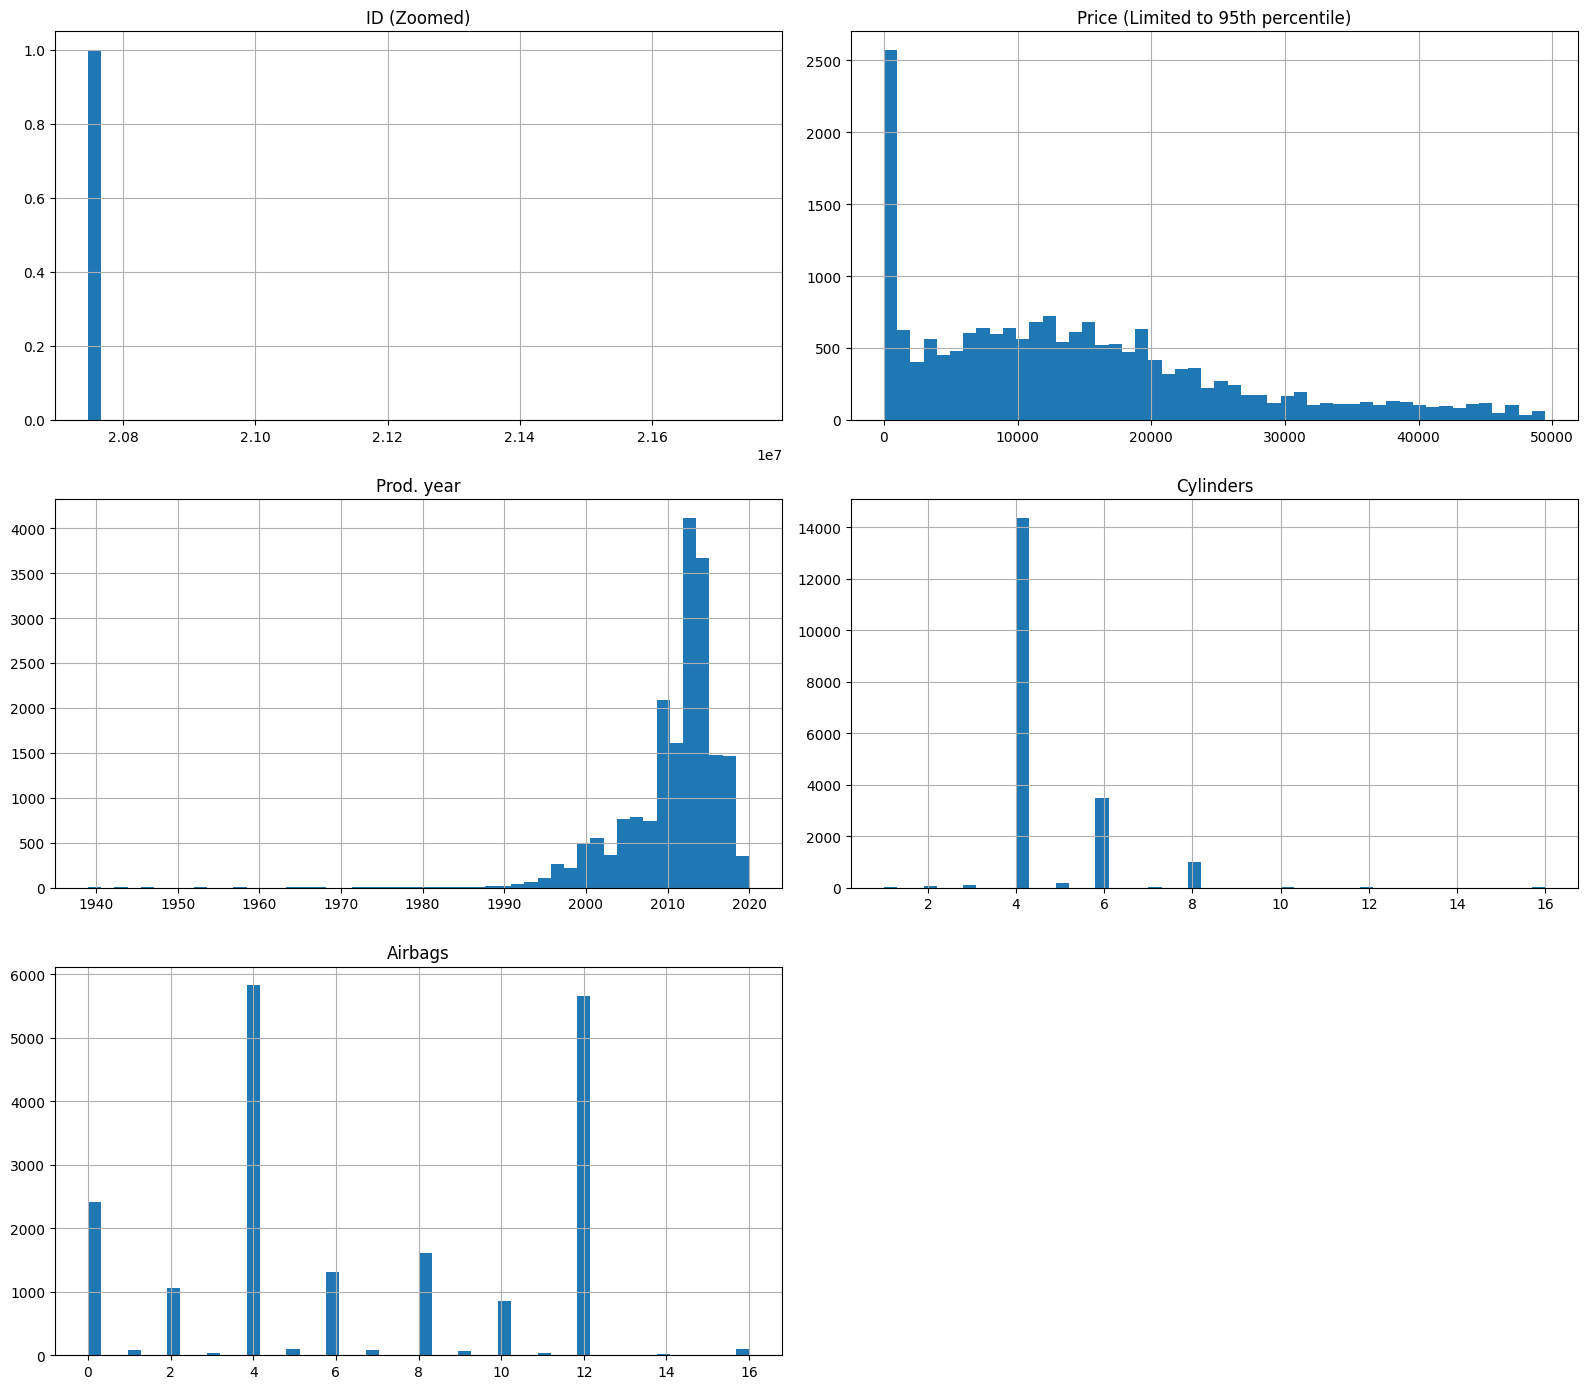

In [ ]:
import matplotlib.pyplot as plt

# Plotar histogramas ajustados para tornar "ID" e "Price" mais compreens√≠veis
fig, axs = plt.subplots(3, 2, figsize=(16, 14))

# Alterando a vari√°vel de "columns" para "Columns"
Columns = ['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']
data = df[Columns]

for i, column in enumerate(Columns):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    if column == 'ID':
        ax.hist(data[column], bins=50, range=(data['ID'].min(), data['ID'].min() + 1e6))
        ax.set_title(f'{column} (Zoomed)')
    elif column == 'Price':
        ax.hist(data[column], bins=50, range=(0, data['Price'].quantile(0.95)))
        ax.set_title(f'{column} (Limited to 95th percentile)')
    else:
        ax.hist(data[column], bins=50)
        ax.set_title(column)

    ax.grid()

# Remover subplot vazio (se houver n√∫mero √≠mpar de gr√°ficos)
if len(Columns) % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()


## Descri√ß√£o do Dataset

O dataset inclui as seguintes colunas principais:

- **Price**: Pre√ßo do carro (vari√°vel alvo).
- **Levy**: Taxa associada ao ve√≠culo.
- **Manufacturer**: Fabricante do ve√≠culo.
- **Model**: Modelo do carro.
- **Prod. year**: Ano de fabrica√ß√£o.
- **Category**: Categoria do carro (Jeep, Hatchback, etc.).
- **Fuel type**: Tipo de combust√≠vel (Petrol, Hybrid, etc.).
- **Engine volume**: Volume do motor em litros.
- **Mileage**: Quilometragem (km).
- **Cylinders**: N√∫mero de cilindros.
- **Gear box type**: Tipo de c√¢mbio (Automatic, Tiptronic, etc.).
- **Drive wheels**: Tipo de tra√ß√£o (4x4, Front, etc.).
- **Color**: Cor do ve√≠culo.
- **Airbags**: N√∫mero de airbags.

O dataset possui tamb√©m 19237 linhas

---

Inicialmente, podemos dizer que o dataset √© bem estruturado e com isso, podemos iniciar uma an√°lise inicial.



## *Criando uma copia e iniciando a explora√ß√£o incial*

- Primeiramente, criamos uma c√≥pia do dataframe chamada "df_exp"
- Depois, removemos a coluna ID pois se torna irrelevante para o que queremos prever aqui
- Criamos uma vari√°vel de faixas de pre√ßo chamada "price_category" que servir√° para a estratifica√ß√£o em faixas de pre√ßos que iremos fazer

In [ ]:
# Ajustando o c√≥digo para usar "df_exp" ao inv√©s de "df_exploracao"

# Criar uma c√≥pia do dataset para explora√ß√£o
df_exp = df.copy()

# Remover a coluna ID, pois n√£o √© relevante para a predi√ß√£o
if 'ID' in df_exp.columns:
    df_exp.drop('ID', axis=1, inplace=True)

# Convertendo a coluna 'Mileage' para um formato num√©rico (removendo ' km')
df_exp["Mileage"] = df_exp["Mileage"].str.replace(" km", "").astype(float)

# Criar uma vari√°vel de faixas de pre√ßo para estratifica√ß√£o
df_exp["price_category"] = pd.cut(df_exp["Price"],
                                  bins=[0, 5000, 15000, 30000, 50000, float('inf')],
                                  labels=[1, 2, 3, 4, 5])  # 5 categorias de pre√ßo


## Dividindo a c√≥pia do dataset em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Criando um split estratificado
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Dividir os dados mantendo a propor√ß√£o das categorias de pre√ßo
for train_index, test_index in split.split(df_exp, df_exp["price_category"]):
    strat_train_set = df_exp.loc[train_index]
    strat_test_set = df_exp.loc[test_index]

# Remover a coluna de categoriza√ß√£o ap√≥s o split
strat_train_set = strat_train_set.drop("price_category", axis=1)
strat_test_set = strat_test_set.drop("price_category", axis=1)

# Exibir a distribui√ß√£o das faixas de pre√ßo no treino e teste
print("Distribui√ß√£o de pre√ßos no conjunto de treino:")
print(strat_train_set["Price"].value_counts())

print("\nDistribui√ß√£o de pre√ßos no conjunto de teste:")
print(strat_test_set["Price"].value_counts())




Distribui√ß√£o de pre√ßos no conjunto de treino:
Price
470      226
15681    223
14113    206
392      202
314      192
        ... 
11900      1
31650      1
31245      1
60684      1
46891      1
Name: count, Length: 2066, dtype: int64

Distribui√ß√£o de pre√ßos no conjunto de teste:
Price
15681    57
10976    51
7840     51
12544    50
470      48
         ..
16041     1
36539     1
36692     1
43000     1
16408     1
Name: count, Length: 978, dtype: int64


## *Visualizando os Dados*

Antes de prosseguir com a modelagem, √© essencial entender a estrutura do dataset. Nesta se√ß√£o, analisamos os tipos de atributos presentes, identificamos vari√°veis categ√≥ricas e num√©ricas e verificamos poss√≠veis inconsist√™ncias nos dados. Essa visualiza√ß√£o inicial nos ajuda a definir quais transforma√ß√µes ser√£o necess√°rias no pr√©-processamento e a garantir que as informa√ß√µes estejam formatadas corretamente para os modelos de Machine Learning.


Tipos de atributos

In [ ]:
strat_train_set.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage             float64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

## Estudo dos Atributos e Suas Propriedades

| **Atributo**          | **Tipo**                | **Propriedades**                                      |
|------------------------|-------------------------|------------------------------------------------------|
| **Price**             | Num√©rico (`int`), bounded | Vari√°vel de sa√≠da (target).                          |
| **Levy**              | Texto ou categ√≥rico     | Pode conter valores ausentes ou n√£o num√©ricos.       |
| **Manufacturer**      | Categ√≥rico              | Marca do carro (nominal).                            |
| **Model**             | Texto ou categ√≥rico     | Nome do modelo do carro.                             |
| **Prod. year**        | Num√©rico (`int`), bounded | Ano de produ√ß√£o.                                     |
| **Category**          | Categ√≥rico              | Tipo de carro (ex.: SUV, Sedan).                     |
| **Leather interior**  | Categ√≥rico bin√°rio      | Indica presen√ßa de interior de couro.                |
| **Fuel type**         | Categ√≥rico              | Tipo de combust√≠vel (ex.: gasolina, diesel).         |
| **Engine volume**     | Texto ou num√©rico       | Inclui valores como "2.0" ou "3.5 Turbo".            |
| **Mileage**           | Texto estruturado       | Quilometragem (ex.: "150,000 km").                   |
| **Cylinders**         | Num√©rico (`float`), bounded | N√∫mero de cilindros.                                 |
| **Gear box type**     | Categ√≥rico              | Tipo de transmiss√£o (ex.: manual, autom√°tico).       |
| **Drive wheels**      | Categ√≥rico              | Tipo de tra√ß√£o (ex.: traseira, AWD).                 |
| **Doors**             | Texto ou categ√≥rico     | N√∫mero de portas.                                    |
| **Wheel**             | Categ√≥rico bin√°rio      | Posi√ß√£o do volante (ex.: "Left", "Right").           |
| **Color**             | Categ√≥rico              | Cor do carro.                                        |
| **Airbags**           | Num√©rico (`int`), bounded | Quantidade de airbags.                               |



## % de valores ausentes

In [ ]:
valores_ausentes = strat_train_set.isnull().mean() * 100
print(valores_ausentes)

Price               0.0
Levy                0.0
Manufacturer        0.0
Model               0.0
Prod. year          0.0
Category            0.0
Leather interior    0.0
Fuel type           0.0
Engine volume       0.0
Mileage             0.0
Cylinders           0.0
Gear box type       0.0
Drive wheels        0.0
Doors               0.0
Wheel               0.0
Color               0.0
Airbags             0.0
dtype: float64


A verifica√ß√£o da porcentagem de valores ausentes √© uma etapa fundamental no pr√©-processamento dos dados. Neste caso, observamos que todas as colunas possuem **0% de valores ausentes**, indicando que o dataset est√° completo e n√£o h√° necessidade de imputa√ß√£o ou remo√ß√£o de registros. Isso facilita a modelagem, evitando a introdu√ß√£o de vi√©s causado por preenchimentos artificiais ou perda de informa√ß√µes relevantes.


## Realizando uma an√°lise da coluna 'Price'

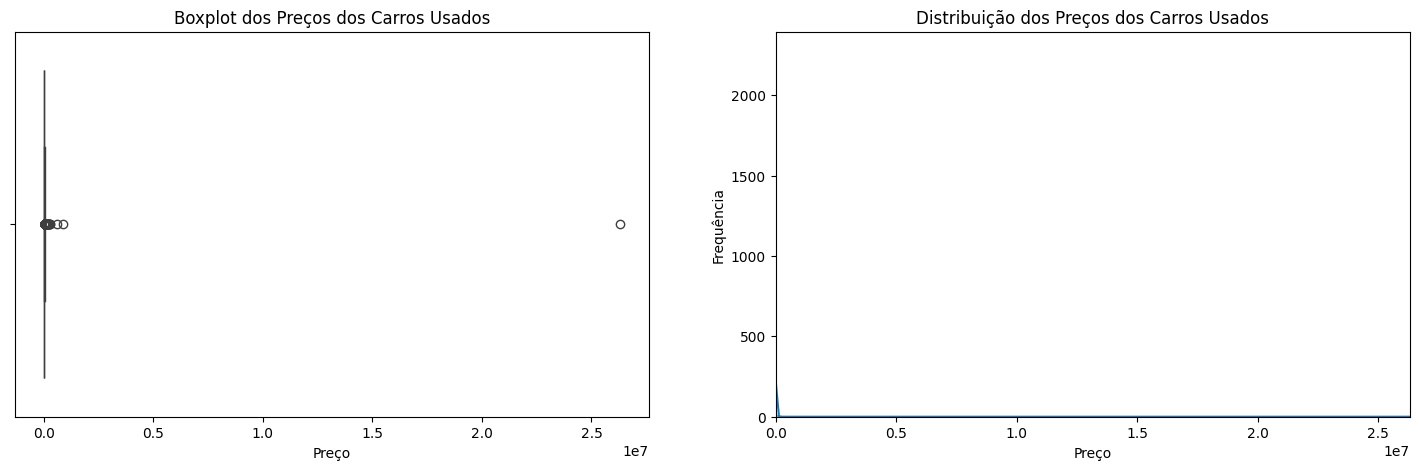

In [ ]:
# Importar bibliotecas para visualiza√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns

# Analisar a distribui√ß√£o da coluna 'Price'
plt.figure(figsize=(18, 5))

# Histograma da distribui√ß√£o dos pre√ßos
plt.subplot(1, 2, 2)
sns.histplot(strat_train_set['Price'], kde=True)
plt.title('Distribui√ß√£o dos Pre√ßos dos Carros Usados')
plt.xlabel('Pre√ßo')
plt.ylabel('Frequ√™ncia')
plt.xlim(0, strat_train_set['Price'].max())

# Boxplot dos pre√ßos
plt.subplot(1, 2, 1)
sns.boxplot(x='Price', data=strat_train_set)
plt.title('Boxplot dos Pre√ßos dos Carros Usados')
plt.xlabel('Pre√ßo')

# Mostrar os gr√°ficos
plt.show()


Nesta etapa, analisamos a distribui√ß√£o dos pre√ßos dos carros usados, nossa vari√°vel alvo. O **boxplot** revela a presen√ßa de **outliers**, indicando que alguns ve√≠culos possuem pre√ßos significativamente mais altos do que a maioria dos dados. A distribui√ß√£o tamb√©m mostra uma concentra√ß√£o de valores pr√≥ximos ao in√≠cio do eixo, refor√ßando a necessidade de um tratamento adequado para evitar que esses valores extremos impactem negativamente o desempenho dos modelos.

Para garantir uma modelagem mais robusta e evitar vi√©s, realizaremos uma limpeza dos dados, removendo ou tratando esses outliers antes do treinamento dos modelos.


## agrupando agora as marcas de carro com suas categorias

<Figure size 1400x800 with 0 Axes>

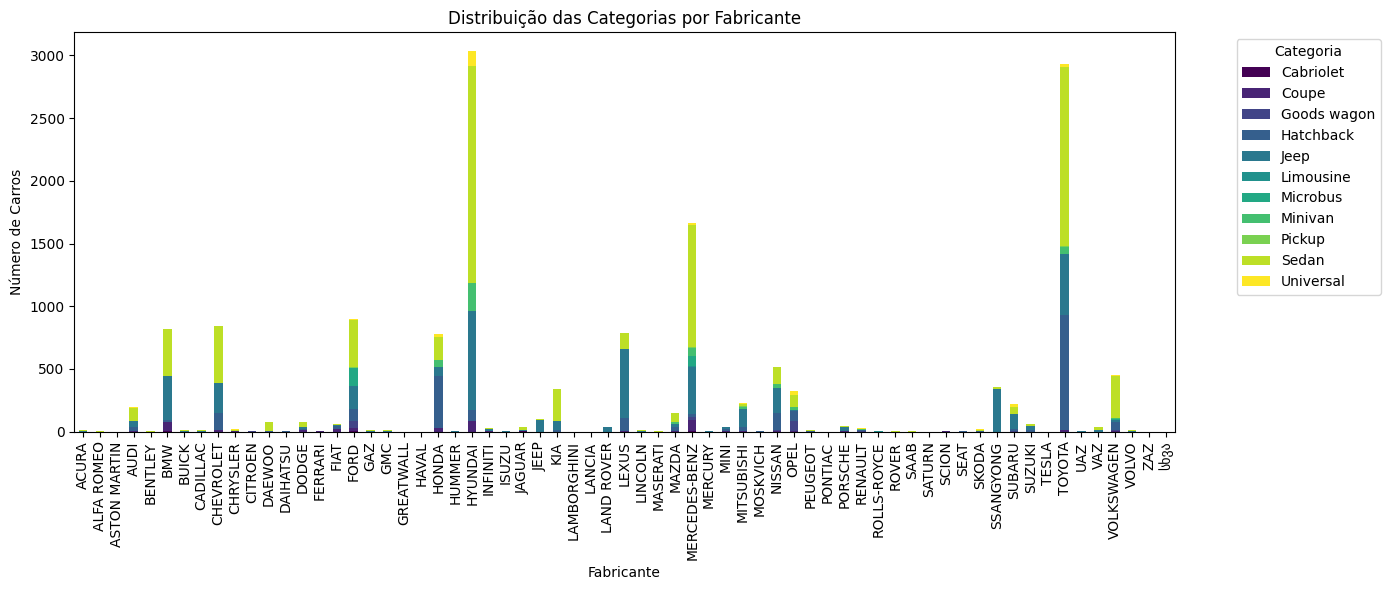

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma tabela de conting√™ncia para contar quantas categorias cada fabricante possui
df_grouped = strat_train_set.groupby(['Manufacturer', 'Category']).size().unstack()

# Configurar o tamanho do gr√°fico
plt.figure(figsize=(14, 8))

# Criar um gr√°fico de barras empilhadas
df_grouped.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 6))

# Personalizar o gr√°fico
plt.title('Distribui√ß√£o das Categorias por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('N√∫mero de Carros')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Girar os r√≥tulos do eixo X para melhor leitura

# Exibir o gr√°fico
plt.tight_layout()
plt.show()


O gr√°fico acima mostra a rela√ß√£o entre os **fabricantes de autom√≥veis** e as **categorias de ve√≠culos**, ajudando a identificar quais tipos de carros cada marca produz com mais frequ√™ncia. As barras representam o n√∫mero total de carros por fabricante, enquanto as cores indicam as diferentes categorias.

### **Observa√ß√µes:**
- Algumas marcas, como **Toyota e Hyundai**, possuem uma grande variedade de categorias, enquanto outras, como **Ferrari e Lamborghini**, concentram-se em poucas categorias espec√≠ficas.
- A categoria **Sedan** parece ser a mais frequente em diversos fabricantes, sugerindo que √© um tipo de carro amplamente produzido e ofertado no mercado.
- Marcas com menor presen√ßa no dataset apresentam um n√∫mero limitado de categorias.


## Distribui√ß√£o de Pre√ßos por Fabricante  

Nesta an√°lise, exploramos a **varia√ß√£o dos pre√ßos dos ve√≠culos por fabricante**. Utilizando um **boxplot**, conseguimos visualizar a mediana, a dispers√£o dos pre√ßos e poss√≠veis diferen√ßas entre as marcas. Essa informa√ß√£o ajuda a entender como o **fabricante impacta o valor dos carros** no mercado.  


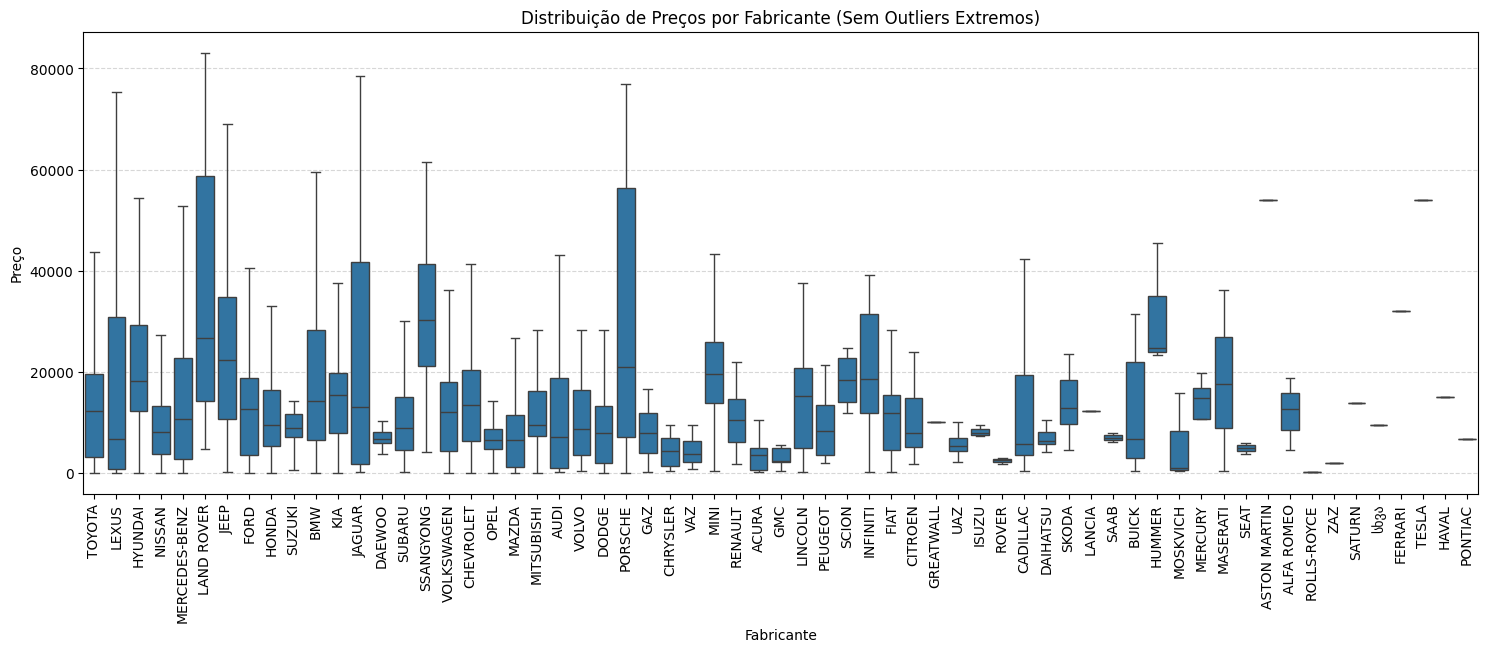

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Criando c√≥pia do dataframe para evitar altera√ß√µes no original
df_viz = strat_train_set.copy()

# Remover outliers extremos no pre√ßo para melhor visualiza√ß√£o
df_viz = df_viz[df_viz['Price'] < df_viz['Price'].quantile(0.99)]

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_viz, x='Manufacturer', y='Price', showfliers=False)  # Oculta outliers extremos
plt.xticks(rotation=90)
plt.title('Distribui√ß√£o de Pre√ßos por Fabricante (Sem Outliers Extremos)')
plt.xlabel('Fabricante')
plt.ylabel('Pre√ßo')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



 - Observamos que h√° **varia√ß√£o significativa de pre√ßos entre os fabricantes**, indicando que a marca do ve√≠culo √© um fator relevante na precifica√ß√£o.  
- Algumas marcas possuem uma **faixa de pre√ßos mais concentrada**, enquanto outras apresentam **distribui√ß√µes mais amplas**, sugerindo diferentes segmentos de mercado.  
- Modelos de marcas premium, como **Porsche, Rolls-Royce e Ferrari**, tendem a ter pre√ßos m√©dios mais elevados.  


## Distribui√ß√£o dos Tipos de C√¢mbio  

Nesta an√°lise, exploramos a **frequ√™ncia dos diferentes tipos de c√¢mbio** nos ve√≠culos do dataset. O gr√°fico de barras exibe quais tipos de transmiss√£o s√£o mais comuns, ajudando a entender a **prefer√™ncia do mercado** e poss√≠veis impactos no pre√ßo dos carros.  


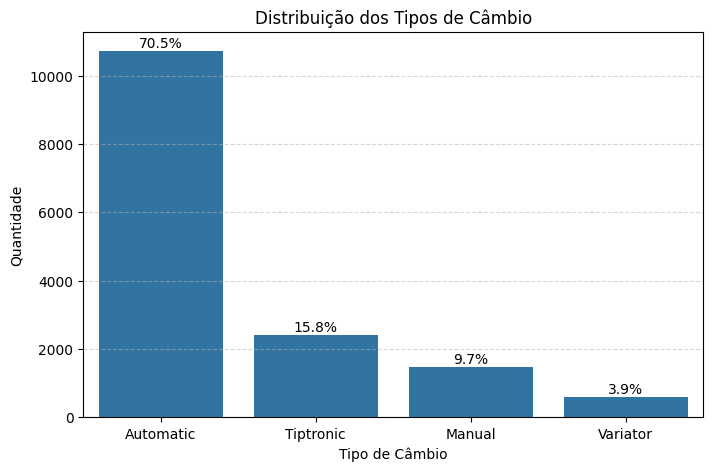

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_viz, x='Gear box type', order=df_viz['Gear box type'].value_counts().index)
plt.title('Distribui√ß√£o dos Tipos de C√¢mbio')
plt.xlabel('Tipo de C√¢mbio')
plt.ylabel('Quantidade')

# Adicionar porcentagens acima das barras
total = len(df_viz)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()




- A maioria dos ve√≠culos no dataset possui **c√¢mbio autom√°tico (70.5%)**, sugerindo uma prefer√™ncia por esse tipo de transmiss√£o.  
- O **c√¢mbio Tiptronic (15.8%)** √© o segundo mais comum, enquanto os **manuais (9.7%)** representam uma parcela menor do mercado.  
- O tipo **Variator (3.9%)** √© o menos frequente, o que pode indicar que √© uma tecnologia menos adotada pelos fabricantes.   


## Rela√ß√£o entre Quilometragem e Pre√ßo  

Este gr√°fico de dispers√£o analisa a **influ√™ncia da quilometragem no pre√ßo dos ve√≠culos**. A linha de tend√™ncia indica se h√° uma correla√ß√£o entre esses dois fatores, ajudando a entender o impacto do uso do carro em sua desvaloriza√ß√£o.  


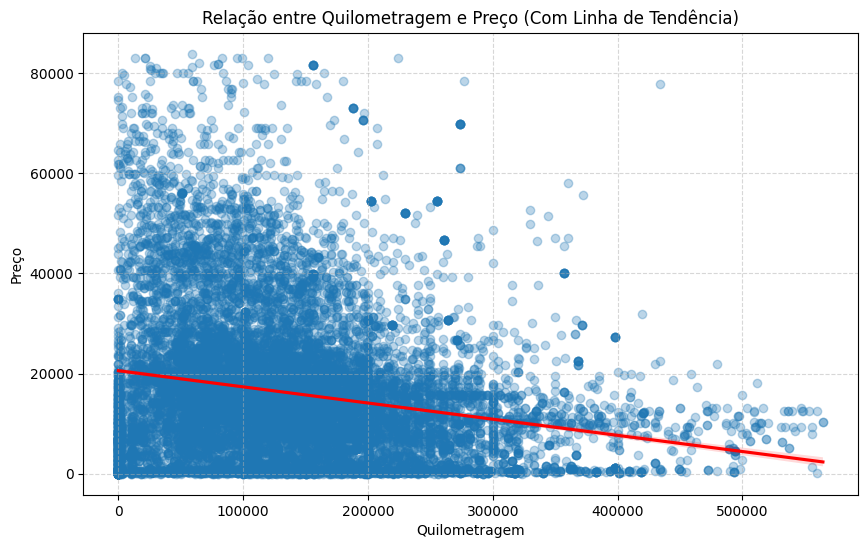

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar uma c√≥pia do dataframe para evitar altera√ß√µes no original
df_viz = strat_train_set.copy()

# Remover outliers extremos em 'Mileage' e 'Price' (acima do percentil 99)
df_viz = df_viz[(df_viz['Mileage'] < df_viz['Mileage'].quantile(0.99)) &
                (df_viz['Price'] < df_viz['Price'].quantile(0.99))]

# Criar gr√°fico de dispers√£o com melhor visualiza√ß√£o
plt.figure(figsize=(10, 6))
sns.regplot(data=df_viz, x='Mileage', y='Price', scatter_kws={'alpha': 0.3}, line_kws={"color": "red"})
plt.title('Rela√ß√£o entre Quilometragem e Pre√ßo (Com Linha de Tend√™ncia)')
plt.xlabel('Quilometragem')
plt.ylabel('Pre√ßo')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

- Como esperado, existe uma **correla√ß√£o negativa** entre **quilometragem** e **pre√ßo** dos ve√≠culos: **quanto maior a quilometragem, menor o pre√ßo**.
- A linha de tend√™ncia indica que a **desvaloriza√ß√£o do ve√≠culo** ocorre de forma consistente com o aumento da quilometragem, mas com grande varia√ß√£o nos pre√ßos.
- Alguns ve√≠culos com alta quilometragem ainda apresentam **pre√ßos elevados**, o que pode ser explicado por outros fatores, como a **marca** ou **estado de conserva√ß√£o**.

## An√°lise da Distribui√ß√£o das Vari√°veis Num√©ricas

Para entender melhor a distribui√ß√£o dos dados antes do pr√©-processamento, realizamos uma an√°lise explorat√≥ria das principais **vari√°veis num√©ricas** do dataset. Isso nos permite visualizar padr√µes, identificar poss√≠veis **valores discrepantes (outliers)** e compreender a varia√ß√£o de cada atributo.

### **O que ser√° feito?**
- Criamos uma **c√≥pia do dataset** para garantir que o original permane√ßa inalterado.
- **Convertimos a coluna `'Levy'` para num√©rica**, substituindo valores n√£o num√©ricos por `NaN` e imputando valores ausentes com a m√©dia.
- Selecionamos apenas os **atributos num√©ricos** relevantes.
- Removemos **outliers** de algumas vari√°veis, como **'Price'**, para melhorar a visualiza√ß√£o.
- Geramos **histogramas** para visualizar a distribui√ß√£o de cada vari√°vel.


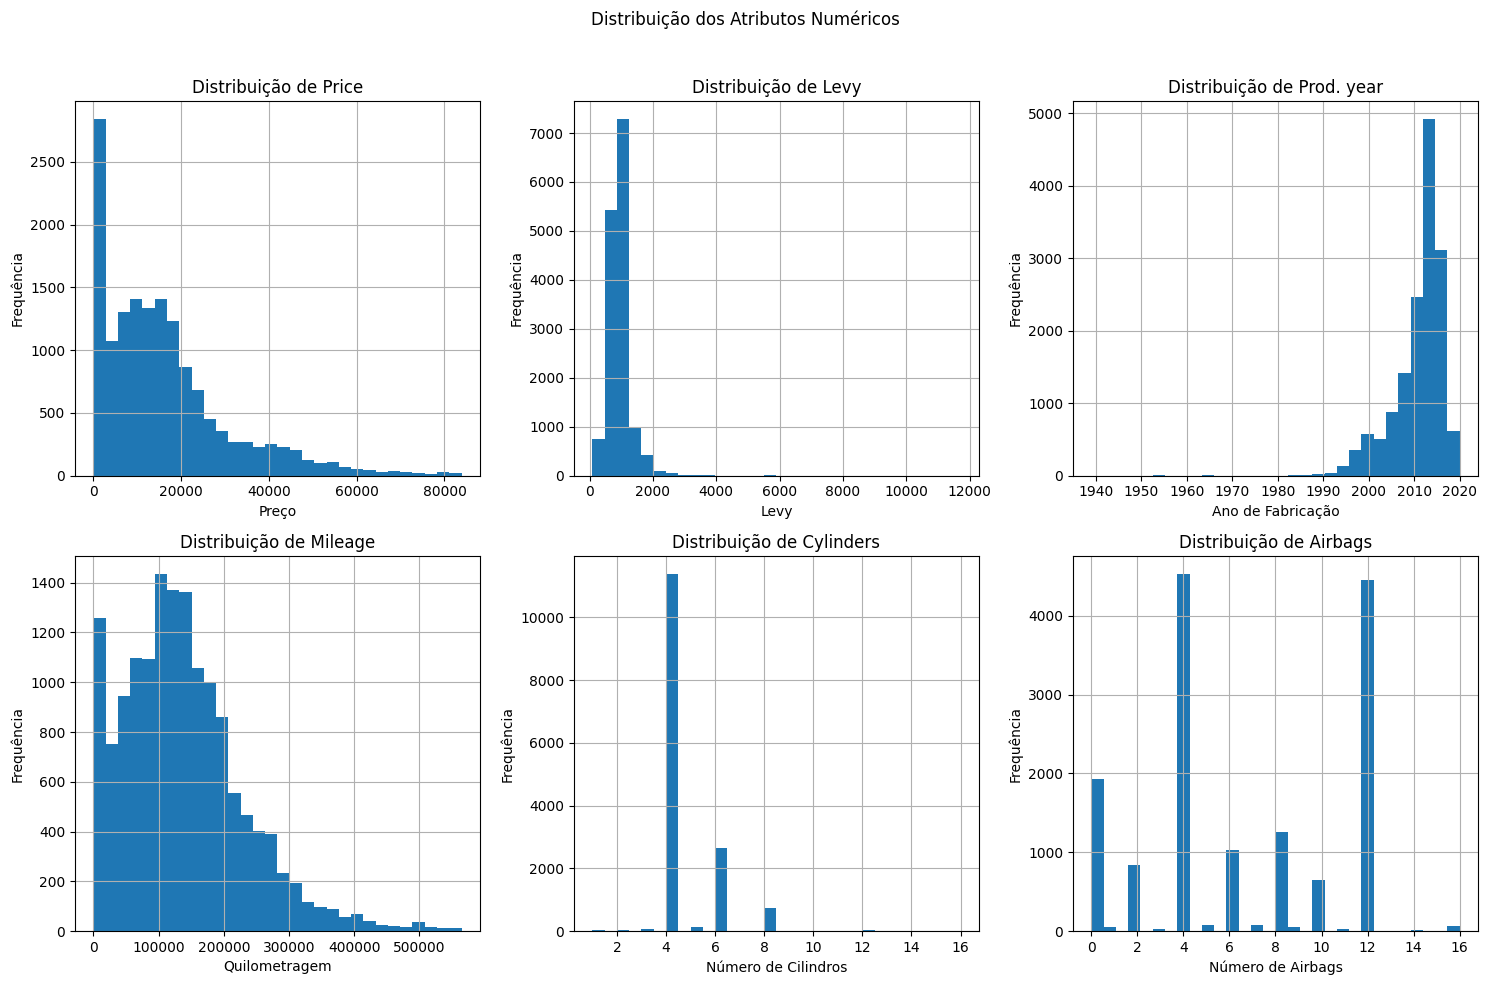

In [ ]:
import matplotlib.pyplot as plt

# Usar a c√≥pia j√° limpa (df_viz) para visualiza√ß√£o
df_viz = df_viz[['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']]

# Converter a coluna 'Levy' para num√©rico, tratando valores n√£o num√©ricos como NaN
df_viz['Levy'] = pd.to_numeric(df_viz['Levy'], errors='coerce')

# Substituir os valores NaN de Levy com a m√©dia ou outra estrat√©gia de imputa√ß√£o
df_viz['Levy'].fillna(df_viz['Levy'].mean(), inplace=True)

# Criar a figura para visualiza√ß√£o das distribui√ß√µes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df_viz['Price'].hist(bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribui√ß√£o de Price')
axes[0, 0].set_xlabel('Pre√ßo')
axes[0, 0].set_ylabel('Frequ√™ncia')

df_viz['Levy'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribui√ß√£o de Levy')
axes[0, 1].set_xlabel('Levy')
axes[0, 1].set_ylabel('Frequ√™ncia')

df_viz['Prod. year'].hist(bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribui√ß√£o de Prod. year')
axes[0, 2].set_xlabel('Ano de Fabrica√ß√£o')
axes[0, 2].set_ylabel('Frequ√™ncia')

df_viz['Mileage'].hist(bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribui√ß√£o de Mileage')
axes[1, 0].set_xlabel('Quilometragem')
axes[1, 0].set_ylabel('Frequ√™ncia')

df_viz['Cylinders'].hist(bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribui√ß√£o de Cylinders')
axes[1, 1].set_xlabel('N√∫mero de Cilindros')
axes[1, 1].set_ylabel('Frequ√™ncia')

df_viz['Airbags'].hist(bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribui√ß√£o de Airbags')
axes[1, 2].set_xlabel('N√∫mero de Airbags')
axes[1, 2].set_ylabel('Frequ√™ncia')

plt.suptitle('Distribui√ß√£o dos Atributos Num√©ricos')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Conclus√µes sobre a Distribui√ß√£o das Vari√°veis Num√©ricas

Os histogramas acima mostram a distribui√ß√£o das principais **vari√°veis num√©ricas** do dataset. Essa an√°lise nos permite identificar padr√µes, tend√™ncias e poss√≠veis problemas nos dados, al√©m de oferecer insights importantes para a modelagem.

### **Principais Observa√ß√µes:**
- **Presen√ßa de Outliers:**
  - As vari√°veis **Price, Levy e Mileage** apresentam valores extremos, especialmente ap√≥s a convers√£o de `'Levy'` para num√©rico. Esses outliers podem impactar a modelagem, e sua remo√ß√£o ou imputa√ß√£o √© crucial para evitar distor√ß√µes nos resultados dos modelos de Machine Learning.
  
- **Distribui√ß√£o Assim√©trica:**
  - As vari√°veis **Price e Levy** possuem distribui√ß√µes com uma concentra√ß√£o em valores mais baixos, sugerindo uma grande quantidade de ve√≠culos com pre√ßos mais acess√≠veis e **taxas** mais baixas.
  - A vari√°vel **Mileage** apresenta uma grande concentra√ß√£o de quilometragem baixa, mas tamb√©m possui **valores excessivamente altos**, indicando poss√≠veis erros ou carros com quilometragem fora da realidade.

- **Ano de Fabrica√ß√£o (`Prod. year`)**  
  - A maioria dos ve√≠culos foi fabricada nos **√∫ltimos anos**, sugerindo uma predomin√¢ncia de carros mais novos no dataset, o que pode impactar o modelo dependendo da distribui√ß√£o real de idade dos ve√≠culos.

- **N√∫mero de Cilindros e Airbags**  
  - A distribui√ß√£o dessas vari√°veis indica que **4 cilindros** e **12 airbags** s√£o comuns nos carros do dataset, possivelmente refletindo tend√™ncias e prefer√™ncias do mercado atual, o que pode ser √∫til para prever o tipo de ve√≠culo.

## Matriz de Correla√ß√£o entre os Atributos Num√©ricos

Nesta etapa, analisamos a **correla√ß√£o entre as vari√°veis num√©ricas** do dataset. A matriz de correla√ß√£o nos ajuda a identificar quais atributos possuem **rela√ß√µes fortes entre si**, permitindo uma melhor sele√ß√£o de features e evitando redund√¢ncia nos modelos.


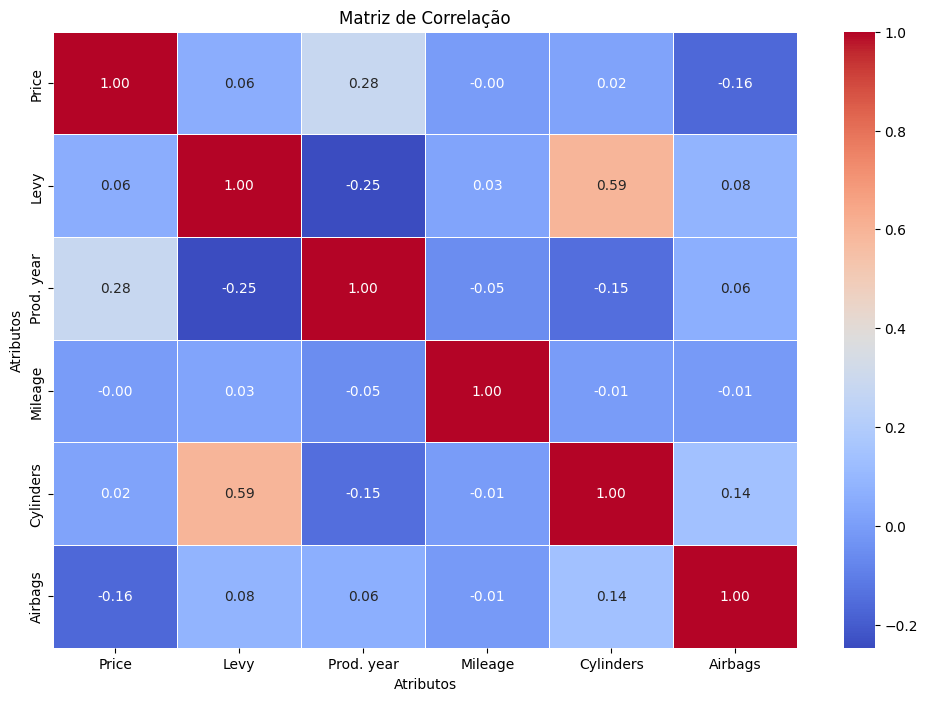

In [ ]:
# Visualizar a correla√ß√£o entre os atributos num√©ricos
correlacao = df_viz.corr()
plt.figure(figsize=(12, 8))
plt.title('Matriz de Correla√ß√£o')
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xlabel('Atributos')
plt.ylabel('Atributos')
plt.show()

# Identificar pares de atributos com alta correla√ß√£o (acima de 0.8 ou abaixo de -0.8)
alta_correlacao = correlacao[(correlacao > 0.8) | (correlacao < -0.8)]

A matriz de correla√ß√£o acima nos permite identificar **rela√ß√µes entre as vari√°veis num√©ricas** do dataset. Algumas observa√ß√µes importantes:

- **A vari√°vel 'Price' n√£o apresenta correla√ß√£o forte com nenhuma vari√°vel num√©rica**, sugerindo que outros fatores (como caracter√≠sticas categ√≥ricas) podem ser mais relevantes para prever o pre√ßo dos carros.
- **'Cylinders' e 'Levy' possuem uma correla√ß√£o moderada (0.59)**, indicando que ve√≠culos com motores mais potentes podem ter taxas mais altas.
- **'Mileage' e 'Price' possuem uma correla√ß√£o praticamente nula (~0.00)**, o que pode indicar que a quilometragem isoladamente n√£o √© um fator determinante para o pre√ßo.



Vamos relacionar o 'Prod. year' com 'Price', diferenciando por 'Fuel type' (Tipo de combust√≠vel)

## Rela√ß√£o entre Pre√ßo, Ano de Fabrica√ß√£o e Tipo de Combust√≠vel  

Nesta etapa, analisamos como o **ano de fabrica√ß√£o** influencia o **pre√ßo dos ve√≠culos**, diferenciando os dados pelo **tipo de combust√≠vel**. Essa visualiza√ß√£o nos ajuda a identificar tend√™ncias no mercado e poss√≠veis diferen√ßas de valoriza√ß√£o entre combust√≠veis.  


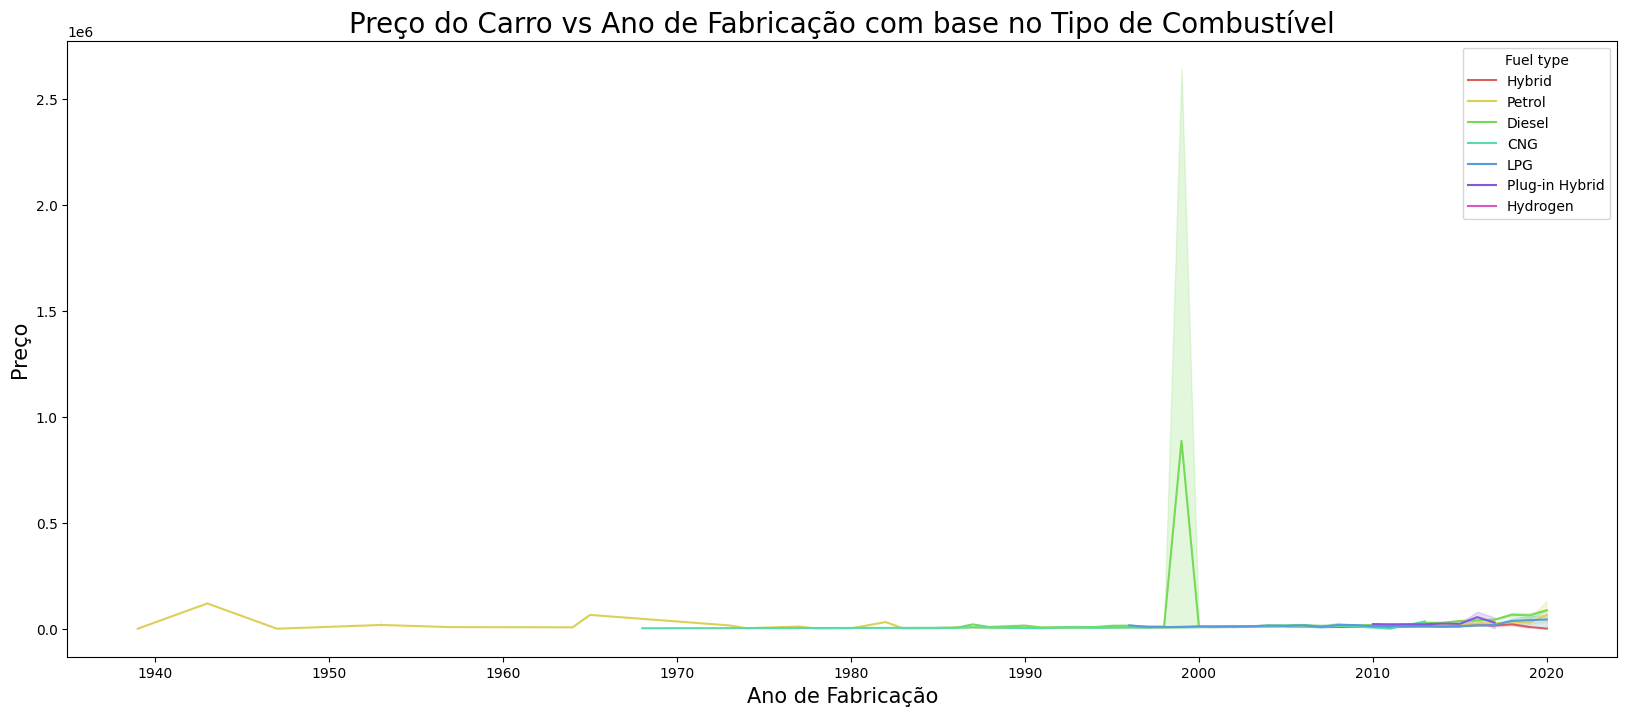

In [ ]:
# Escolher atributos relevantes para uma visualiza√ß√£o similar

plt.figure(figsize=(20, 8))

sns.lineplot(data=strat_train_set, x='Prod. year', y='Price', hue='Fuel type', palette='hls')

# Configurar t√≠tulo e r√≥tulos
plt.title('Pre√ßo do Carro vs Ano de Fabrica√ß√£o com base no Tipo de Combust√≠vel', fontsize=20)
plt.xlabel('Ano de Fabrica√ß√£o', fontsize=15)
plt.ylabel('Pre√ßo', fontsize=15)

# Exibir o gr√°fico
plt.show()


O gr√°fico acima mostra a varia√ß√£o do **pre√ßo dos ve√≠culos ao longo dos anos de fabrica√ß√£o**, diferenciando-os pelo **tipo de combust√≠vel**.  

### **Principais Observa√ß√µes:**  
- H√° um **pico at√≠pico em torno dos anos 2000**, possivelmente causado por **outliers** ou registros incorretos no dataset.  
- No geral, os pre√ßos parecem **aumentar levemente para ve√≠culos mais novos**, o que √© esperado.  
- Diferentes tipos de combust√≠vel apresentam varia√ß√µes similares ao longo do tempo, sem uma distin√ß√£o clara entre os grupos.  

### **Pr√≥ximos Passos:**  
- **Investigar os outliers** identificados no gr√°fico para verificar sua influ√™ncia na modelagem.  
- Aplicar t√©cnicas de **tratamento de dados** para garantir que a an√°lise n√£o seja distorcida por valores an√¥malos.  


## *Prepara√ß√£o dos dados e limpeza*

In [ ]:
# Fun√ß√£o para limpeza de dados e remo√ß√£o de outliers
def clean_data(df):
    df = df.copy()  # Criar uma c√≥pia para evitar altera√ß√µes no original

    # Converter colunas num√©ricas para formato adequado
    df["Mileage"] = df["Mileage"].astype(str).str.replace(" km", "").astype(float)  # Garantir que 'Mileage' seja string
    df["Levy"] = df["Levy"].replace("-", "0").astype(float)

    # Remover outliers evidentes
    df = df[df["Prod. year"] >= 1980]  # Removendo ve√≠culos fabricados antes de 1980

    # Remover outliers baseados no pre√ßo (assumindo valores extremamente altos como outliers)
    df = df[df["Price"] > 100]  # Remover pre√ßos irreais muito baixos
    df = df[df["Price"] < df["Price"].quantile(0.99)]  # Remover os 1% valores mais altos

    return df

# Aplicar a fun√ß√£o de limpeza ao dataset original
df_exp = clean_data(df_exp)


In [ ]:
# Recarregar as bibliotecas ap√≥s o reset do ambiente
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


# Fun√ß√£o de pr√©-processamento para garantir a compatibilidade com o pipeline
def preprocessing(df):
    df = df.copy()

    # Converter colunas bin√°rias em valores num√©ricos
    df["Leather interior"] = df["Leather interior"].replace({'Yes': 1, 'No': 0}).astype(int)
    df["Wheel"] = df["Wheel"].replace({'Left wheel': 0, 'Right-hand drive': 1}).astype(int)

    # Converter "Doors" para num√©rico, garantindo que esteja como int
    df["Doors"] = df["Doors"].str.extract('(\d+)').astype(float).astype('Int64')

    # Convers√£o correta de `ord__Doors` para inteiro
    if "Doors" in df.columns:
        df["Doors"] = df["Doors"].astype("Int64")  # Converter para inteiro adequado

    # Separar "Engine volume" em duas colunas: volume e turbo
    df["Turbo"] = df["Engine volume"].str.contains("Turbo", na=False).astype(int)
    df["Engine volume"] = df["Engine volume"].str.replace(" Turbo", "", regex=True).astype(float)

    # Codificar "Manufacturer" e "Model" com LabelEncoder
    encoder_manufacturer = LabelEncoder()
    encoder_model = LabelEncoder()
    df["Manufacturer"] = encoder_manufacturer.fit_transform(df["Manufacturer"])
    df["Model"] = encoder_model.fit_transform(df["Model"])

    return df

# Aplicar a fun√ß√£o de pr√©-processamento no conjunto de treino
df_preprocessed = preprocessing(df_exp)

# Definir atributos num√©ricos, categ√≥ricos e ordinais ap√≥s pr√©-processamento
num_attribs = ["Levy", "Prod. year", "Mileage", "Cylinders", "Airbags"]
cat_attribs = ["Category", "Fuel type", "Gear box type", "Drive wheels", "Color"]  # Mantendo categorias antes de OHE
ord_attribs = ["Doors", "Turbo"]

# Criar pipeline de pr√©-processamento ajustado
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),  # Normaliza√ß√£o dos atributos num√©ricos
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),  # One-Hot Encoding para categ√≥ricos
    ("ord", OrdinalEncoder(categories=[[2, 3, 4, 5], [0, 1]]), ord_attribs),  # Codifica√ß√£o ordinal
])

# Aplicar o pipeline ao conjunto de treino
strat_train_set_prepared = full_pipeline.fit_transform(df_preprocessed)

# Criar um DataFrame com os dados transformados
strat_train_set_prepared_df = pd.DataFrame(
    strat_train_set_prepared.toarray(),  # Converter matriz esparsa em array denso
    columns=full_pipeline.get_feature_names_out()  # Obter os nomes das colunas geradas pelo pipeline
)

# Exibir os dados originais e os dados transformados
print(df_preprocessed.tail())
print('-/-' * 50)
print(strat_train_set_prepared_df.tail())


       Price    Levy  Manufacturer  Model  Prod. year Category  \
19232   8467     0.0            34    369        1999    Coupe   
19233  15681   831.0            22   1286        2011    Sedan   
19234  26108   836.0            22   1391        2010     Jeep   
19235   5331  1288.0             7    439        2007     Jeep   
19236    470   753.0            22   1286        2012    Sedan   

       Leather interior Fuel type  Engine volume   Mileage  Cylinders  \
19232                 1       CNG            2.0  300000.0        4.0   
19233                 1    Petrol            2.4  161600.0        4.0   
19234                 1    Diesel            2.0  116365.0        4.0   
19235                 1    Diesel            2.0   51258.0        4.0   
19236                 1    Hybrid            2.4  186923.0        4.0   

      Gear box type Drive wheels  Doors  Wheel   Color  Airbags  \
19232        Manual         Rear      2      0  Silver        5   
19233     Tiptronic        Fro

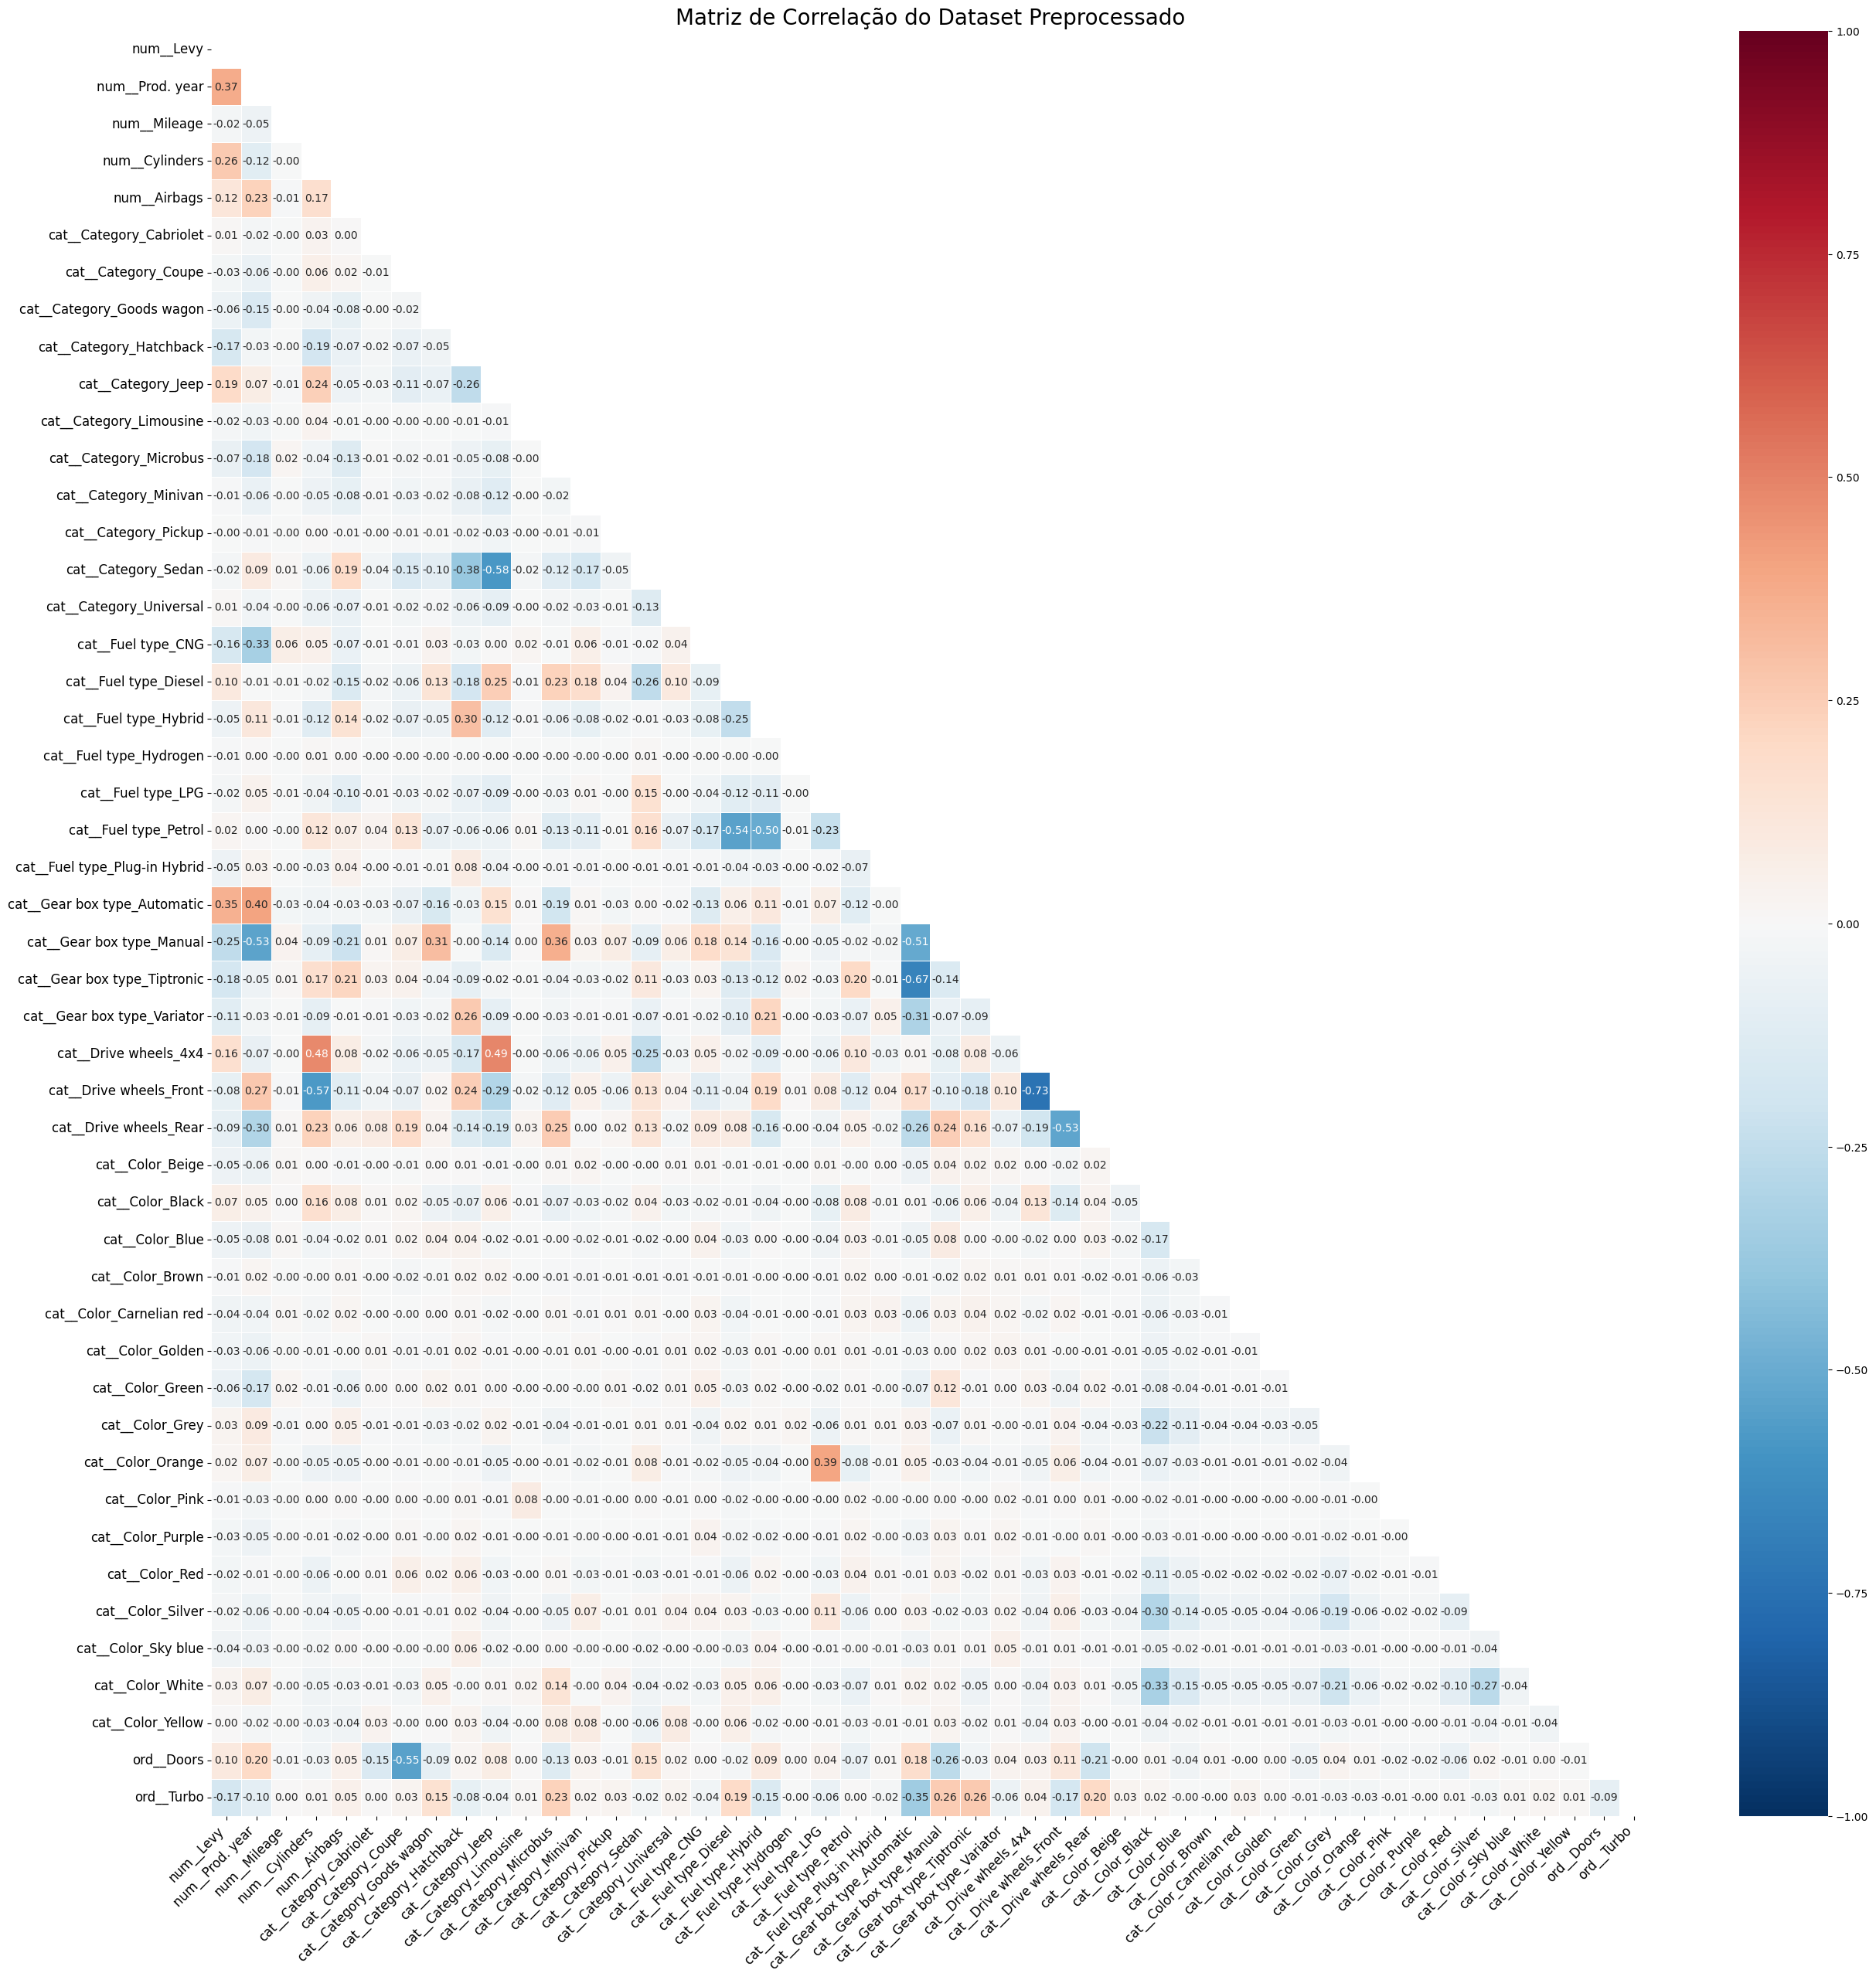

In [ ]:
# Criar uma m√°scara para ocultar a parte superior da matriz de correla√ß√£o
mask = np.triu(np.ones_like(strat_train_set_prepared_df.corr(), dtype=bool))

plt.figure(figsize=(30, 30))

# Plotar a matriz de correla√ß√£o
sns.heatmap(
    strat_train_set_prepared_df.corr(),
    mask=mask,
    annot=True,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    cmap='RdBu_r',
    linewidths=0.5,
    fmt='.2f',
    annot_kws={"size": 10}
)

# Configurar t√≠tulo e r√≥tulos
plt.title('Matriz de Correla√ß√£o do Dataset Preprocessado', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Exibir o gr√°fico
plt.show()


Por√©m, a correla√ß√£o √© uma boa m√©trica para relacionamento linear, mas n√£o destaca os n√£o lineares. Para isso, usamos informa√ß√µes m√∫tuas, por isso usamos a Medi√ß√£o de Informa√ß√£o M√∫tua (MI) que ajuda a identificar quais vari√°veis independentes (features) t√™m maior relev√¢ncia ou depend√™ncia com a vari√°vel dependente (target). Isso √© √∫til para sele√ß√£o de features, onde queremos escolher as vari√°veis mais informativas para o modelo. podendo ela capturar tanto rela√ß√µes lineares quanto n√£o lineares entre as vari√°veis.

Para interpret√°-la:

A MI √© sempre n√£o negativa e varia de 0 a ‚àû.
MI = 0: Indica que n√£o h√° depend√™ncia entre a feature e o target. A feature n√£o fornece nenhuma informa√ß√£o sobre o target.
MI > 0: Indica que h√° alguma depend√™ncia entre a feature e o target. Quanto maior o valor, maior a depend√™ncia.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Fun√ß√£o para calcular a Medi√ß√£o de Informa√ß√£o M√∫tua (MI)
def make_mi_scores(X, y):
    # Fazer uma c√≥pia para evitar altera√ß√µes no dataset original
    X = X.copy()

    # Transformar colunas categ√≥ricas em num√©ricas usando factorize()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

    # Criar uma lista booleana para identificar os atributos discretos
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]

    # Calcular os scores de Informa√ß√£o M√∫tua
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)

    # Transformar os scores em uma s√©rie do pandas
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores

# Criar uma c√≥pia do dataset preprocessado e definir a vari√°vel alvo (pre√ßo)
X = df_preprocessed.copy()
y = X.pop("Price")  # Remover "Price" do conjunto de features e us√°-lo como target

# Calcular os MI Scores
mi_scores = make_mi_scores(X, y)

# Exibir os scores ordenados
print(mi_scores.sort_values(ascending=False))


price_category      1.431599
Model               0.953173
Mileage             0.904661
Levy                0.850806
Airbags             0.455723
Prod. year          0.425425
Manufacturer        0.407132
Engine volume       0.377807
Fuel type           0.221161
Gear box type       0.201598
Category            0.169512
Leather interior    0.149517
Drive wheels        0.124757
Color               0.122966
Cylinders           0.105691
Wheel               0.065381
Turbo               0.051165
Doors               0.014662
Name: MI Scores, dtype: float64


# **An√°lise das Features Mais Informativas na Predi√ß√£o de Pre√ßo de Carros Usados**

## **Features Mais Informativas:**
- **price_category (1.431599):** A categoriza√ß√£o do pre√ßo √© a vari√°vel mais informativa, mostrando uma forte rela√ß√£o com o valor final dos ve√≠culos.
- **Model (0.953173):** O modelo do carro tem uma grande influ√™ncia no pre√ßo, pois diferentes modelos da mesma marca podem apresentar grande varia√ß√£o de valor.
- **Mileage (0.904661):** A quilometragem rodada pelo ve√≠culo tem um impacto direto no pre√ßo, com carros menos rodados geralmente sendo mais valorizados.
- **Levy (0.850806):** A taxa associada ao ve√≠culo tamb√©m apresenta uma alta correla√ß√£o, possivelmente refletindo custos extras que impactam o pre√ßo final.
- **Airbags (0.455723):** A presen√ßa de airbags afeta o valor do carro, pois ve√≠culos com mais recursos de seguran√ßa tendem a ser mais valorizados.

## **Features Moderadamente Informativas:**
- **Prod. year (0.425425):** O ano de fabrica√ß√£o influencia o pre√ßo, pois ve√≠culos mais novos geralmente custam mais.
- **Manufacturer (0.407132):** A marca do carro tem um impacto consider√°vel, pois algumas s√£o mais valorizadas no mercado de revenda.
- **Engine volume (0.377807):** O volume do motor tem uma influ√™ncia relevante, com motores maiores e mais potentes geralmente elevando o pre√ßo do ve√≠culo.
- **Fuel type (0.221161):** O tipo de combust√≠vel afeta o pre√ßo, pois carros el√©tricos e h√≠bridos costumam ser mais caros que os convencionais a gasolina ou diesel.
- **Gear box type (0.201598):** O tipo de c√¢mbio tamb√©m tem um impacto moderado, com ve√≠culos autom√°ticos geralmente mais valorizados.

## **Features Menos Informativas:**
- **Category (0.169512):** A categoria do ve√≠culo (SUV, Sedan, Hatchback, etc.) influencia o pre√ßo, mas em menor grau.
- **Leather interior (0.149517):** A presen√ßa de interior de couro tem uma influ√™ncia menor sobre o pre√ßo do carro.
- **Drive wheels (0.124757):** O tipo de tra√ß√£o (dianteira, traseira, 4x4) tem um impacto pequeno no valor do ve√≠culo.
- **Color (0.122966):** A cor do ve√≠culo tem pouca influ√™ncia no pre√ßo final, embora algumas cores sejam mais populares.
- **Cylinders (0.105691):** O n√∫mero de cilindros do motor apresenta uma baixa rela√ß√£o com o pre√ßo do ve√≠culo.
- **Wheel (0.065381):** A posi√ß√£o do volante (esquerda/direita) tem pouca ou nenhuma influ√™ncia no pre√ßo.
- **Turbo (0.051165):** A presen√ßa de turbo no motor tem um impacto m√≠nimo no pre√ßo final do carro.
- **Doors (0.014662):** O n√∫mero de portas do ve√≠culo √© a vari√°vel menos informativa, sem rela√ß√£o significativa com o pre√ßo.



In [ ]:
# Selecionar as top 10 features mais informativas
top_10_features = mi_scores.head(10)
print("Top 10 features mais informativas:\n", top_10_features)

# Filtrar o DataFrame original para incluir apenas essas features
selected_features = top_10_features.index
X_selected = X[selected_features]

Top 10 features mais informativas:
 price_category    1.431599
Model             0.953173
Mileage           0.904661
Levy              0.850806
Airbags           0.455723
Prod. year        0.425425
Manufacturer      0.407132
Engine volume     0.377807
Fuel type         0.221161
Gear box type     0.201598
Name: MI Scores, dtype: float64


## Pr√©-sele√ß√£o de modelos

In [ ]:
# Importar bibliotecas necess√°rias
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Selecionar os modelos para a predi√ß√£o de pre√ßos de carros usados
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5)
}

# Exibir os modelos selecionados
print("Modelos Selecionados para Predi√ß√£o de Pre√ßos de Carros Usados:")
for name in models.keys():
    print("-", name)


Modelos Selecionados para Predi√ß√£o de Pre√ßos de Carros Usados:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- K-Neighbors Regressor


# **Modelos Selecionados para a Predi√ß√£o de Pre√ßos de Carros Usados**

## **Linear Regression**
A **Regress√£o Linear** √© um modelo estat√≠stico que assume uma rela√ß√£o linear entre a vari√°vel dependente (pre√ßo do carro) e as vari√°veis independentes (features). A fun√ß√£o de custo minimiza a soma dos quadrados dos erros, ajustando uma linha reta para prever os valores. √â um modelo **simples e interpret√°vel**, √∫til como baseline, mas pode n√£o capturar rela√ß√µes **n√£o lineares** entre os atributos.

## **Decision Tree Regressor**
O **Decision Tree Regressor** √© um modelo baseado em √°rvore de decis√£o que divide os dados em **subconjuntos hier√°rquicos**, criando regras de decis√£o para prever o pre√ßo do carro. Ele seleciona os atributos que melhor segmentam os dados, usando m√©tricas como vari√¢ncia reduzida. Esse modelo √© eficiente para capturar **rela√ß√µes n√£o lineares**, mas pode sofrer **overfitting** se a √°rvore for muito profunda.

## **Random Forest Regressor**
O **Random Forest Regressor** √© um conjunto de m√∫ltiplas √°rvores de decis√£o treinadas de forma independente em amostras diferentes do dataset. Cada √°rvore faz uma previs√£o, e o resultado final √© a m√©dia das previs√µes individuais. Esse m√©todo ajuda a **reduzir o overfitting** e melhora a **precis√£o** do modelo, tornando-o mais robusto. √â uma √≥tima escolha para regress√£o em **dados tabulares** como os de pre√ßos de carros usados.

## **Gradient Boosting Regressor**
O **Gradient Boosting Regressor** √© um modelo que cria √°rvores de decis√£o de forma sequencial, corrigindo os erros das √°rvores anteriores. Ele **prioriza os erros das previs√µes anteriores**, ajustando o modelo de forma mais precisa a cada itera√ß√£o. Apesar de ser mais **lento para treinar**, esse m√©todo geralmente fornece **√≥timos resultados em predi√ß√£o** e pode superar o Random Forest em alguns cen√°rios.

## **K-Nearest Neighbors Regressor (KNN Regressor)**
O **KNN Regressor** √© um modelo baseado na proximidade entre os dados. Para prever o pre√ßo de um carro, ele encontra os **K ve√≠culos mais semelhantes** no conjunto de treinamento e calcula a m√©dia dos seus pre√ßos. O desempenho do modelo depende da escolha de **K** e da forma como a dist√¢ncia √© calculada. √â um modelo **simples**, mas pode ser **computacionalmente custoso** para grandes volumes de dados e **sens√≠vel a atributos irrelevantes**.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Definir as features e a vari√°vel alvo corretamente
X = strat_train_set_prepared_df  # As features transformadas
y = df_preprocessed["Price"]  # A vari√°vel alvo original

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar DataFrames para os conjuntos de treino e teste sem PCA
X_train_sem_pca = pd.DataFrame(X_train, columns=X.columns)
X_test_sem_pca = pd.DataFrame(X_test, columns=X.columns)

# Aplica√ß√£o do PCA para redu√ß√£o de dimensionalidade
pca = PCA(n_components=0.95)  # Mant√©m 95% da vari√¢ncia
X_train_com_pca = pca.fit_transform(X_train)
X_test_com_pca = pca.transform(X_test)

# Converter os arrays transformados de volta para DataFrames
X_train_com_pca = pd.DataFrame(X_train_com_pca)
X_test_com_pca = pd.DataFrame(X_test_com_pca)

# Exibir o tamanho dos conjuntos
print("Formato dos Conjuntos de Treinamento e Teste:")
print("X_train_sem_pca:", X_train_sem_pca.shape, "X_test_sem_pca:", X_test_sem_pca.shape)
print("X_train_com_pca:", X_train_com_pca.shape, "X_test_com_pca:", X_test_com_pca.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# Imprimir os nomes das colunas do DataFrame de treino e teste sem PCA
print("Colunas do X_train_sem_pca:", X_train_sem_pca.columns.tolist())
print("Colunas do X_test_sem_pca:", X_test_sem_pca.columns.tolist())

# Exibir as primeiras linhas de y_train e y_test para verificar a estrutura
print("Amostra de y_train:")
print(y_train.head())

print("Amostra de y_test:")
print(y_test.head())

# Definir os modelos incluindo o PCA no pipeline
models = {
    "Linear Regression": Pipeline(steps=[('pca', pca), ('model', LinearRegression())]),
    "Decision Tree Regressor": Pipeline(steps=[('pca', pca), ('model', DecisionTreeRegressor(random_state=42))]),
    "Random Forest Regressor": Pipeline(steps=[('pca', pca), ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    "Gradient Boosting Regressor": Pipeline(steps=[('pca', pca), ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))]),
    "K-Neighbors Regressor": Pipeline(steps=[('pca', pca), ('model', KNeighborsRegressor(n_neighbors=5))])
}

# Definir as m√©tricas de desempenho
scorers = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(mean_squared_error, squared=False, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Definir diferentes valores para o n√∫mero de folds
folds = [3, 5]

# Exibir os modelos definidos com PCA
print("Modelos definidos para treinamento com PCA:")
for nome, modelo in models.items():
    print("-", nome)


Formato dos Conjuntos de Treinamento e Teste:
X_train_sem_pca: (14910, 48) X_test_sem_pca: (3728, 48)
X_train_com_pca: (14910, 19) X_test_com_pca: (3728, 19)
y_train: (14910,) y_test: (3728,)
Colunas do X_train_sem_pca: ['num__Levy', 'num__Prod. year', 'num__Mileage', 'num__Cylinders', 'num__Airbags', 'cat__Category_Cabriolet', 'cat__Category_Coupe', 'cat__Category_Goods wagon', 'cat__Category_Hatchback', 'cat__Category_Jeep', 'cat__Category_Limousine', 'cat__Category_Microbus', 'cat__Category_Minivan', 'cat__Category_Pickup', 'cat__Category_Sedan', 'cat__Category_Universal', 'cat__Fuel type_CNG', 'cat__Fuel type_Diesel', 'cat__Fuel type_Hybrid', 'cat__Fuel type_Hydrogen', 'cat__Fuel type_LPG', 'cat__Fuel type_Petrol', 'cat__Fuel type_Plug-in Hybrid', 'cat__Gear box type_Automatic', 'cat__Gear box type_Manual', 'cat__Gear box type_Tiptronic', 'cat__Gear box type_Variator', 'cat__Drive wheels_4x4', 'cat__Drive wheels_Front', 'cat__Drive wheels_Rear', 'cat__Color_Beige', 'cat__Color_Blac

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate

# Dicion√°rio para armazenar os conjuntos sem e com PCA
datasets = {
    "Sem PCA": X_train_sem_pca,
    "Com PCA": X_train_com_pca
}

# Fun√ß√£o auxiliar para extrair a import√¢ncia das features corretamente do Pipeline
def get_feature_importance(pipeline):
    # Extrair o modelo real de dentro do Pipeline
    model = pipeline.named_steps["model"]

    if hasattr(model, "coef_") and model.coef_ is not None:  # Modelos lineares (ex.: Regress√£o Linear)
        return np.abs(model.coef_)
    elif hasattr(model, "feature_importances_"):  # Modelos baseados em √°rvores
        return model.feature_importances_
    else:
        return None  # Modelos como KNN n√£o possuem import√¢ncia de features

# Loop para gerar a import√¢ncia das features para os modelos sem e com PCA
for tipo_pca, X_treino in datasets.items():
    print(f"\nüìä Import√¢ncia das Features - Modelos {tipo_pca}")

    for nome_modelo, pipeline in models.items():
        print(f"\nAvaliando o modelo: {nome_modelo} ({tipo_pca})")

        # Avalia√ß√£o do modelo com valida√ß√£o cruzada
        scores = cross_validate(pipeline, X_treino, y_train, scoring=scorers, cv=3, return_estimator=True)

        # Coletar a import√¢ncia das features (m√©dia entre os estimadores)
        feature_importances = [get_feature_importance(estimator) for estimator in scores["estimator"]]
        feature_importances = [imp for imp in feature_importances if imp is not None]  # Remover valores None

        # Se o modelo n√£o possuir feature importance, ignoramos
        if not feature_importances:
            print(f"‚ö†Ô∏è {nome_modelo} n√£o possui coeficientes de import√¢ncia de features para exibi√ß√£o.")
            continue

        # Calcular a m√©dia das import√¢ncias das features
        features_mean = np.mean(feature_importances, axis=0)

        # Se estivermos trabalhando com PCA, os nomes das features ser√£o diferentes (componentes principais)
        if tipo_pca == "Sem PCA":
            feature_names = np.array(X_train_sem_pca.columns)
        else:
            feature_names = [f"PC{i+1}" for i in range(X_treino.shape[1])]

        # Ordenar as features por import√¢ncia
        sorted_idx = np.argsort(features_mean)[::-1]  # Ordenar da mais importante para a menos importante

        # Exibir os resultados textualmente
        print(f"\nüìå Import√¢ncia das Features - {nome_modelo} ({tipo_pca}):")
        for idx in sorted_idx:
            print(f"   {feature_names[idx]}: {features_mean[idx]:.6f}")



üìä Import√¢ncia das Features - Modelos Sem PCA

Avaliando o modelo: Linear Regression (Sem PCA)

üìå Import√¢ncia das Features - Linear Regression (Sem PCA):
   cat__Category_Goods wagon: 8663.897488
   num__Airbags: 6574.987697
   cat__Category_Coupe: 4723.220924
   cat__Category_Minivan: 4357.272278
   cat__Category_Limousine: 3852.410732
   cat__Category_Universal: 3242.769638
   num__Cylinders: 2110.762745
   cat__Category_Jeep: 1449.670042
   num__Levy: 1439.210740
   cat__Fuel type_Hybrid: 1343.409286
   cat__Category_Cabriolet: 1295.508086
   num__Prod. year: 1277.664802
   num__Mileage: 1047.680226
   cat__Category_Microbus: 924.087733
   cat__Category_Hatchback: 728.068204
   cat__Fuel type_Diesel: 671.858590
   cat__Category_Sedan: 361.742173
   cat__Category_Pickup: 319.834760
   cat__Fuel type_CNG: 210.739295

Avaliando o modelo: Decision Tree Regressor (Sem PCA)

üìå Import√¢ncia das Features - Decision Tree Regressor (Sem PCA):
   num__Airbags: 0.182349
   num__Levy:

## Fun√ß√£o que avalia os modelos junto com valida√ß√£o cruzada

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def avaliar_modelo(modelo, X_train, y_train, folds):
    resultados = {}
    for fold in folds:
        print(f"Avaliando com {fold} folds...")  # Apenas a mensagem essencial

        resultados[fold] = {}

        try:
            kf = KFold(n_splits=fold, shuffle=True, random_state=42)
            mae_scores = []
            rmse_scores = []
            r2_scores = []

            for train_index, test_index in kf.split(X_train):
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                modelo.fit(X_train_fold, y_train_fold)
                y_pred_fold = modelo.predict(X_test_fold)

                mae_scores.append(mean_absolute_error(y_test_fold, y_pred_fold))
                mse = mean_squared_error(y_test_fold, y_pred_fold)
                rmse_scores.append(np.sqrt(mse))
                r2_scores.append(r2_score(y_test_fold, y_pred_fold))

        except Exception as e:
            print(f"Erro na valida√ß√£o cruzada: {e}")
            continue

        resultados[fold]["MAE"] = {
            "mean_score": np.mean(mae_scores),
            "std_score": np.std(mae_scores)
        }
        resultados[fold]["RMSE"] = {
            "mean_score": np.mean(rmse_scores),
            "std_score": np.std(rmse_scores)
        }
        resultados[fold]["R2"] = {
            "mean_score": np.mean(r2_scores),
            "std_score": np.std(r2_scores)
        }

    return resultados


## Treinando modelos e avaliando os resultados

In [ ]:
# Criar dicion√°rio para armazenar os resultados
resultados_iniciais = {}

# Conjuntos de treino com e sem PCA
datasets = {
    "Sem PCA": X_train_sem_pca,
    "Com PCA": X_train_com_pca
}

# Loop para treinar e avaliar cada modelo
for tipo_pca, X_treino in datasets.items():
    print(f"\nüîç Treinando modelos {tipo_pca}")

    for nome_modelo, modelo in models.items():
        print(f"\nTreinando e avaliando modelo: {nome_modelo} ({tipo_pca})")

        for fold in folds:
            print(f"  Avaliando com {fold} folds...")

            # Ajustar o modelo com os dados de treino
            modelo.fit(X_treino, y_train)

            # Avaliar o modelo com o n√∫mero espec√≠fico de folds
            resultados = avaliar_modelo(modelo, X_treino, y_train, [fold])

            # Armazenar os resultados no dicion√°rio
            if nome_modelo not in resultados_iniciais:
                resultados_iniciais[nome_modelo] = {}

            if tipo_pca not in resultados_iniciais[nome_modelo]:
                resultados_iniciais[nome_modelo][tipo_pca] = {}

            resultados_iniciais[nome_modelo][tipo_pca][fold] = resultados[fold]

        print(f"{nome_modelo} ({tipo_pca}) conclu√≠do.\n{'-'*50}")

# Exibir os resultados finais comparando modelos com e sem PCA
print("\nüìä Resultados Iniciais")
for nome_modelo, resultados_pca in resultados_iniciais.items():
    print(f"\nüîπ Resultados para {nome_modelo}:")
    for tipo_pca, resultados in resultados_pca.items():
        print(f"  üìå {tipo_pca}:")
        for cv, metricas in resultados.items():
            print(f"    {cv} folds:")
            print(f"      MAE:  {abs(metricas['MAE']['mean_score']):.4f} ¬± {metricas['MAE']['std_score']:.4f}")
            print(f"      RMSE: {abs(metricas['RMSE']['mean_score']):.4f} ¬± {metricas['RMSE']['std_score']:.4f}")
            print(f"      R¬≤:   {metricas['R2']['mean_score']:.4f} ¬± {metricas['R2']['std_score']:.4f}")



üîç Treinando modelos Sem PCA

Treinando e avaliando modelo: Linear Regression (Sem PCA)
  Avaliando com 3 folds...
Avaliando com 3 folds...
  Avaliando com 5 folds...
Avaliando com 5 folds...
Linear Regression (Sem PCA) conclu√≠do.
--------------------------------------------------

Treinando e avaliando modelo: Decision Tree Regressor (Sem PCA)
  Avaliando com 3 folds...
Avaliando com 3 folds...
  Avaliando com 5 folds...
Avaliando com 5 folds...
Decision Tree Regressor (Sem PCA) conclu√≠do.
--------------------------------------------------

Treinando e avaliando modelo: Random Forest Regressor (Sem PCA)
  Avaliando com 3 folds...
Avaliando com 3 folds...
  Avaliando com 5 folds...
Avaliando com 5 folds...
Random Forest Regressor (Sem PCA) conclu√≠do.
--------------------------------------------------

Treinando e avaliando modelo: Gradient Boosting Regressor (Sem PCA)
  Avaliando com 3 folds...
Avaliando com 3 folds...
  Avaliando com 5 folds...
Avaliando com 5 folds...
Gradient 

## Resultados

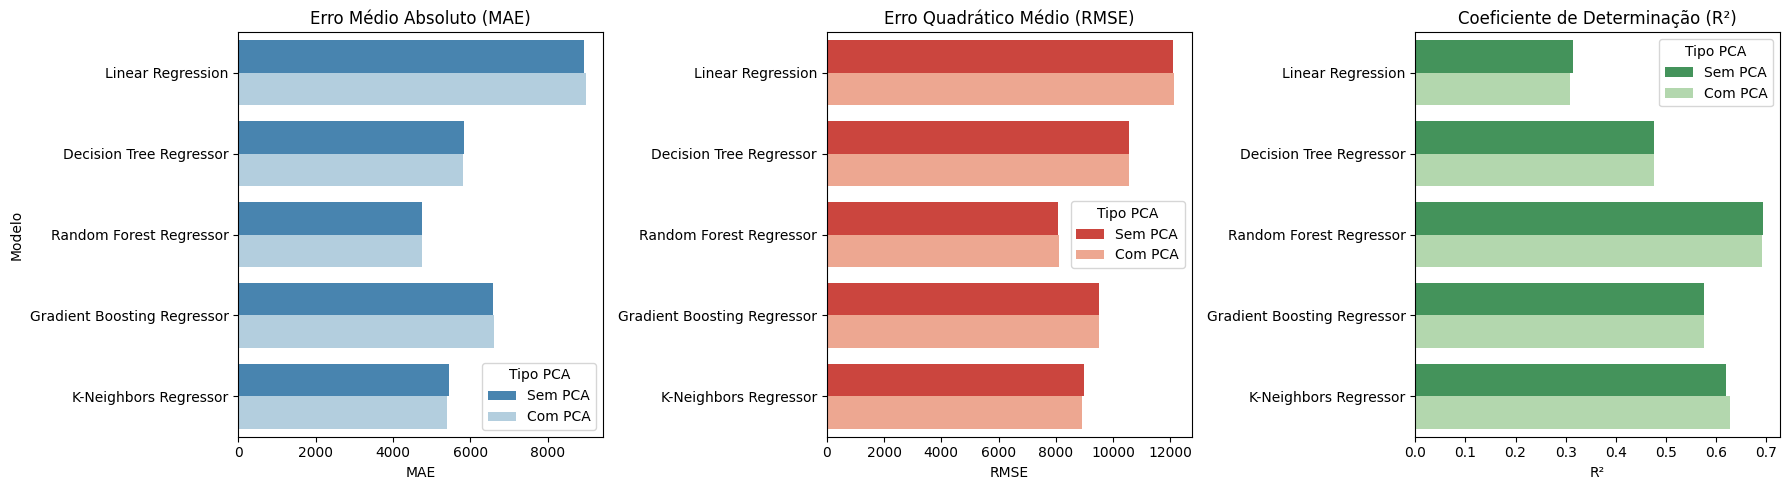

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar listas para armazenar os resultados
modelos = []
tipos_pca = []
mae_scores = []
rmse_scores_list = []
r2_scores = []

# Preencher os dados das m√©tricas para modelos com e sem PCA
for nome_modelo, resultados_pca in resultados_iniciais.items():
    for tipo_pca, resultados in resultados_pca.items():
        modelos.append(nome_modelo)
        tipos_pca.append(tipo_pca)  # "Com PCA" ou "Sem PCA"
        mae_scores.append(abs(resultados[3]["MAE"]["mean_score"]))  # Pegando os resultados de 3 folds
        rmse_scores_list.append(resultados[3]["RMSE"]["mean_score"])
        r2_scores.append(resultados[3]["R2"]["mean_score"])

# Criar DataFrame para visualiza√ß√£o
df_resultados = pd.DataFrame({
    "Modelo": modelos,
    "Tipo PCA": tipos_pca,
    "MAE": mae_scores,
    "RMSE": rmse_scores_list,
    "R¬≤": r2_scores
})

# Configurar tamanho da figura
plt.figure(figsize=(18, 5))

# Gr√°fico de MAE
plt.subplot(1, 3, 1)
sns.barplot(x="MAE", y="Modelo", hue="Tipo PCA", data=df_resultados, palette="Blues_r")
plt.title("Erro M√©dio Absoluto (MAE)")
plt.xlabel("MAE")
plt.ylabel("Modelo")

# Gr√°fico de RMSE
plt.subplot(1, 3, 2)
sns.barplot(x="RMSE", y="Modelo", hue="Tipo PCA", data=df_resultados, palette="Reds_r")
plt.title("Erro Quadr√°tico M√©dio (RMSE)")
plt.xlabel("RMSE")
plt.ylabel("")

# Gr√°fico de R¬≤ Score
plt.subplot(1, 3, 3)
sns.barplot(x="R¬≤", y="Modelo", hue="Tipo PCA", data=df_resultados, palette="Greens_r")
plt.title("Coeficiente de Determina√ß√£o (R¬≤)")
plt.xlabel("R¬≤")
plt.ylabel("")

plt.tight_layout()
plt.show()


## Avalia√ß√£o do Desempenho dos Modelos

Para avaliar o desempenho dos modelos de Machine Learning na predi√ß√£o de pre√ßos de carros usados, consideramos os seguintes crit√©rios:

- **MAE (Erro M√©dio Absoluto)** e **RMSE (Raiz do Erro Quadr√°tico M√©dio)**: Quanto menores, melhor, pois indicam que os valores previstos est√£o mais pr√≥ximos dos valores reais.
- **R¬≤ (Coeficiente de Determina√ß√£o)**: Mede o qu√£o bem o modelo explica a variabilidade dos dados. Quanto mais pr√≥ximo de 1, melhor.

A seguir, apresentamos os resultados da avalia√ß√£o:

| Modelo                      | MAE       | RMSE      | R¬≤     |
|-----------------------------|----------|----------|--------|
| **Linear Regression**       | 8921.49  | 12086.17 | 0.3142 |
| **Decision Tree Regressor** | 5804.15  | 10611.70 | 0.4706 |
| **Random Forest Regressor** | **4672.86** | **7998.08** | **0.6996** |
| **Gradient Boosting Regressor** | 6556.33  | 9404.26  | 0.5847 |
| **K-Neighbors Regressor**   | 5298.80  | 8842.38  | 0.6328 |

### **Ordem Crescente de Desempenho (Melhor para Pior):**

1. **Random Forest Regressor** ‚Üí Melhor desempenho geral, apresentando o menor erro (MAE e RMSE) e o maior R¬≤, o que indica alta precis√£o nas previs√µes.  
2. **K-Neighbors Regressor** ‚Üí Segunda melhor op√ß√£o, com desempenho equilibrado entre erro e explicabilidade.  
3. **Gradient Boosting Regressor** ‚Üí Terceiro melhor modelo, com bons resultados, mas levemente inferior ao KNN.  
4. **Decision Tree Regressor** ‚Üí Embora tenha um erro MAE menor que o Gradient Boosting, seu RMSE √© maior, indicando menor estabilidade.  
5. **Linear Regression** ‚Üí Pior desempenho, com maior erro e menor R¬≤, sugerindo que n√£o captura bem as rela√ß√µes nos dados.  


## *Otimiza√ß√£o de Modelos com Random Search*

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

# Ajustando os hiperpar√¢metros individualmente para cada modelo com PCA
parametros = {
    "Random Forest Regressor (Com PCA)": {
        'model__n_estimators': [150, 200, 250],
        'model__max_depth': [20, 25],
        'model__min_samples_split': [2, 5, 10]  # Evita overfitting
    },
    "K-Neighbors Regressor (Com PCA)": {
        'model__n_neighbors': [5, 7, 9],  # Testando valores maiores
        'model__metric': ['euclidean']  # Mantendo apenas a m√©trica euclidiana
    },
    "Gradient Boosting Regressor (Com PCA)": {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.03, 0.05, 0.07, 0.1],
        'model__max_depth': [4, 5, 6],
        'model__subsample': [0.8, 1.0]  # Regulariza√ß√£o com subsample
    }
}

# Fun√ß√£o para otimizar os modelos com PCA usando RandomizedSearchCV
def otimizar_modelo_com_randomsearch(modelo, parametros, X_train, y_train, folds=3, n_iter=5):
    print(f"Otimiza√ß√£o para {modelo.__class__.__name__} com {folds} folds usando RandomizedSearchCV")
    print('-' * 50)

    random_search = RandomizedSearchCV(
        estimator=modelo,
        param_distributions=parametros,
        n_iter=n_iter,
        cv=folds,
        scoring=scorers,
        refit="R2",  # O modelo ser√° ajustado com base no melhor R¬≤
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)
    return random_search.cv_results_

# Adicionar PCA √† lista de modelos
modelos_para_otimizar = {
    "Random Forest Regressor (Com PCA)": models["Random Forest Regressor"],  # Com PCA
    "K-Neighbors Regressor (Com PCA)": models["K-Neighbors Regressor"],  # Com PCA
    "Gradient Boosting Regressor (Com PCA)": models["Gradient Boosting Regressor"]  # Com PCA
}

# Rodar a otimiza√ß√£o para cada modelo, agora com PCA
resultados_otimizados = {}
for nome, modelo in modelos_para_otimizar.items():
    print(f"\nüîç Otimizando hiperpar√¢metros para: {nome}")

    # Selecionar os dados de treino com PCA
    X_train_usado = X_train_com_pca  # Aqui, X_train_com_pca √© o conjunto de treino com PCA aplicado

    # Realizar a otimiza√ß√£o
    resultados_otimizados[nome] = otimizar_modelo_com_randomsearch(
        modelo, parametros[nome], X_train_usado, y_train, folds=3, n_iter=5
    )

# Exibir os resultados otimizados corretamente
print("\nüìä Resultados Otimizados")
for nome_modelo, resultados in resultados_otimizados.items():
    print(f"\nüìå Resultados otimizados para {nome_modelo}:")
    for i in range(len(resultados['params'])):
        print(f"  üîπ Par√¢metros: {resultados['params'][i]}")
        print(f"    üìâ MAE: M√©dia = {abs(resultados['mean_test_MAE'][i]):.4f}, Desvio Padr√£o = {abs(resultados['std_test_MAE'][i]):.4f}")
        print(f"    üìâ RMSE: M√©dia = {abs(resultados['mean_test_RMSE'][i]):.4f}, Desvio Padr√£o = {abs(resultados['std_test_RMSE'][i]):.4f}")
        print(f"    üìà R¬≤: M√©dia = {resultados['mean_test_R2'][i]:.4f}, Desvio Padr√£o = {resultados['std_test_R2'][i]:.4f}")



üîç Otimizando hiperpar√¢metros para: Random Forest Regressor (Com PCA)
Otimiza√ß√£o para Pipeline com 3 folds usando RandomizedSearchCV
--------------------------------------------------

üîç Otimizando hiperpar√¢metros para: K-Neighbors Regressor (Com PCA)
Otimiza√ß√£o para Pipeline com 3 folds usando RandomizedSearchCV
--------------------------------------------------

üîç Otimizando hiperpar√¢metros para: Gradient Boosting Regressor (Com PCA)
Otimiza√ß√£o para Pipeline com 3 folds usando RandomizedSearchCV
--------------------------------------------------

üìä Resultados Otimizados

üìå Resultados otimizados para Random Forest Regressor (Com PCA):
  üîπ Par√¢metros: {'model__n_estimators': 150, 'model__min_samples_split': 2, 'model__max_depth': 20}
    üìâ MAE: M√©dia = 4743.7610, Desvio Padr√£o = 84.4891
    üìâ RMSE: M√©dia = 8052.8780, Desvio Padr√£o = 217.9998
    üìà R¬≤: M√©dia = 0.6954, Desvio Padr√£o = 0.0135
  üîπ Par√¢metros: {'model__n_estimators': 200, 'mod

## Compara√ß√£o dos Modelos e Pr√≥ximos Passos

Ap√≥s a otimiza√ß√£o dos hiperpar√¢metros com PCA para os tr√™s modelos selecionados, podemos observar os seguintes resultados:

### **Compara√ß√£o de Desempenho:**
- **Random Forest Regressor** foi o modelo com melhor desempenho, alcan√ßando um **R¬≤ m√©dio de 0.6961**, o que indica que o modelo consegue explicar uma boa parte da variabilidade do pre√ßo dos carros. Com uma m√©dia de **MAE de 4743.76**, ele mostrou-se est√°vel e preciso, sendo a op√ß√£o mais eficaz entre os tr√™s.
  
- **Gradient Boosting Regressor** apresentou **R¬≤ m√©dio de 0.6531**, um desempenho inferior ao Random Forest, mas ainda assim um dos melhores entre os m√©todos avaliados. Com um **MAE de 5771.70**, o modelo conseguiu capturar bastante da complexidade dos dados, especialmente quando comparado ao K-Neighbors.

- **K-Neighbors Regressor** apresentou o pior desempenho, com **R¬≤ m√©dio de 0.6206**, indicando uma explica√ß√£o menos eficaz da variabilidade dos dados. Seu **MAE m√©dio** foi o mais alto, sugerindo que ele teve mais dificuldades em prever os pre√ßos com precis√£o, especialmente em dados com maior dispers√£o.

### **Pr√≥ximos Passos:**
Com base nesses resultados, decidimos seguir com os **modelos Random Forest Regressor e Gradient Boosting Regressor**, pois ambos mostraram um desempenho consideravelmente bom. Vamos ent√£o realizar o **Ensemble de Modelos**, onde testaremos uma abordagem de **ensemble**, combinando os melhores resultados dos modelos Random Forest e Gradient Boosting, para tentar obter uma previs√£o ainda mais precisa.



## *Ensemble de Modelos: Random Forest, Gradient Boosting e K-Neighbors*

Nesta etapa, combinamos os **modelos Random Forest**, **Gradient Boosting** e **K-Neighbors** em um **ensemble** utilizando o **Voting Regressor**. O objetivo √© melhorar a precis√£o das previs√µes combinando as sa√≠das dos tr√™s modelos, buscando um desempenho geral melhor ao calcular a m√©dia das previs√µes. Ap√≥s o treinamento do ensemble, vamos avaliar seu desempenho utilizando as m√©tricas **MAE**, **RMSE** e **R¬≤**.


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir os hiperpar√¢metros otimizados para cada modelo
tuned_rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_depth=20, random_state=42)
tuned_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=1.0, random_state=42)
tuned_knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# Criar o ensemble com VotingRegressor
ensemble = VotingRegressor(
    estimators=[
        ('rf', tuned_rf),
        ('gb', tuned_gb),
        ('knn', tuned_knn)
    ],
    weights=[2, 1.5, 1]  # Pesos para RF, GB e KNN
)


# Criar pipeline final com PCA e o ensemble
ensemble_pipeline = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),  # Redu√ß√£o de dimensionalidade
    ('model', ensemble)
])

# Treinar o modelo ensemble com os dados de treino SEM aplicar PCA separadamente
ensemble_pipeline.fit(X_train, y_train)

# Fazer previs√µes no conjunto de teste diretamente (sem necessidade de transformar com PCA separadamente)
y_pred_ensemble = ensemble_pipeline.predict(X_test)

# Avalia√ß√£o do modelo ensemble
mae = mean_absolute_error(y_test, y_pred_ensemble)
mse = mean_squared_error(y_test, y_pred_ensemble)  # Removendo squared=False
rmse = np.sqrt(mse)  # Calculando a raiz quadrada manualmente
r2 = r2_score(y_test, y_pred_ensemble)

# Exibir as m√©tricas de desempenho do ensemble
print(f"üìä Desempenho do Modelo Ensemble:")
print(f"üìâ MAE: {mae:.4f}")
print(f"üìâ RMSE: {rmse:.4f}")
print(f"üìà R¬≤: {r2:.4f}")



üìä Desempenho do Modelo Ensemble:
üìâ MAE: 4923.0068
üìâ RMSE: 8018.2278
üìà R¬≤: 0.7124


## *Resultados*

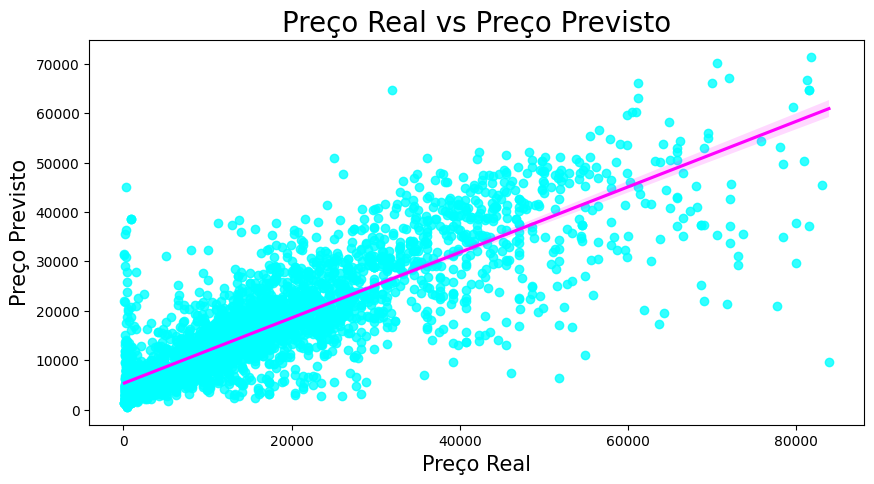

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar DataFrame com valores reais e previstos
out = pd.DataFrame({'Price_actual': y_test, 'Price_pred': y_pred_ensemble})

# Gerar gr√°fico de dispers√£o (Pre√ßo Real vs Pre√ßo Previsto)
plt.figure(figsize=(10, 5))
sns.regplot(x='Price_actual', y='Price_pred', data=out,
            line_kws={'color': 'magenta'}, scatter_kws={'color': 'cyan'})
plt.title('Pre√ßo Real vs Pre√ßo Previsto', fontsize=20)
plt.xlabel('Pre√ßo Real', fontsize=15)
plt.ylabel('Pre√ßo Previsto', fontsize=15)
plt.show()
